In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Scatterplots and Correlation

In [3]:
fuel_econ = pd.read_csv('../data/fuel_econ.csv')
fuel_econ.head(10)
#fuel_econ.size

id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   
5  32209       Lexus          GS 350  2013     Midsize Cars   
6  32210       Lexus      GS 350 AWD  2013     Midsize Cars   
7  32214     Hyundai   Genesis Coupe  2013  Subcompact Cars   
8  32215     Hyundai   Genesis Coupe  2013  Subcompact Cars   
9  32216     Hyundai   Genesis Coupe  2013  Subcompact Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   
5   Rear-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.5   
6    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.5   
7   Rear-Wheel Drive    Automatic 8-spd  Premium Gasoline          4    2.0   
8   Rear-Wheel Drive       Manual 6-spd  Premium Gasoline          4    2.0   
9   Rear-Wheel Drive    Automatic 8-spd  Premium Gasoline          6    3.8   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4   
1   94    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6   
2   94    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5   
3   94    0  16.9415  20.5000  25.2190   33.5000  19.8774  446        5   
4    0   95  24.7726  31.9796  35.5340   51.8816  28.6813  310        8   
5    0   99  19.4325  24.1499  28.2234   38.5000  22.6002  393        6   
6    0   99  18.5752  23.5261  26.3573   36.2109  21.4213  412        5   
7   89    0  17.4460  21.7946  26.6295   37.6731  20.6507  432        5   
8   89    0  20.6741  26.2000  29.2741   41.8000  23.8235  375        6   
9   89    0  16.4675  20.4839  24.5605   34.4972  19.3344  461        4   

   ghgScore  
0         4  
1         6  
2         5  
3         5  
4         8  
5         6  
6         5  
7         5  
8         6  
9         4

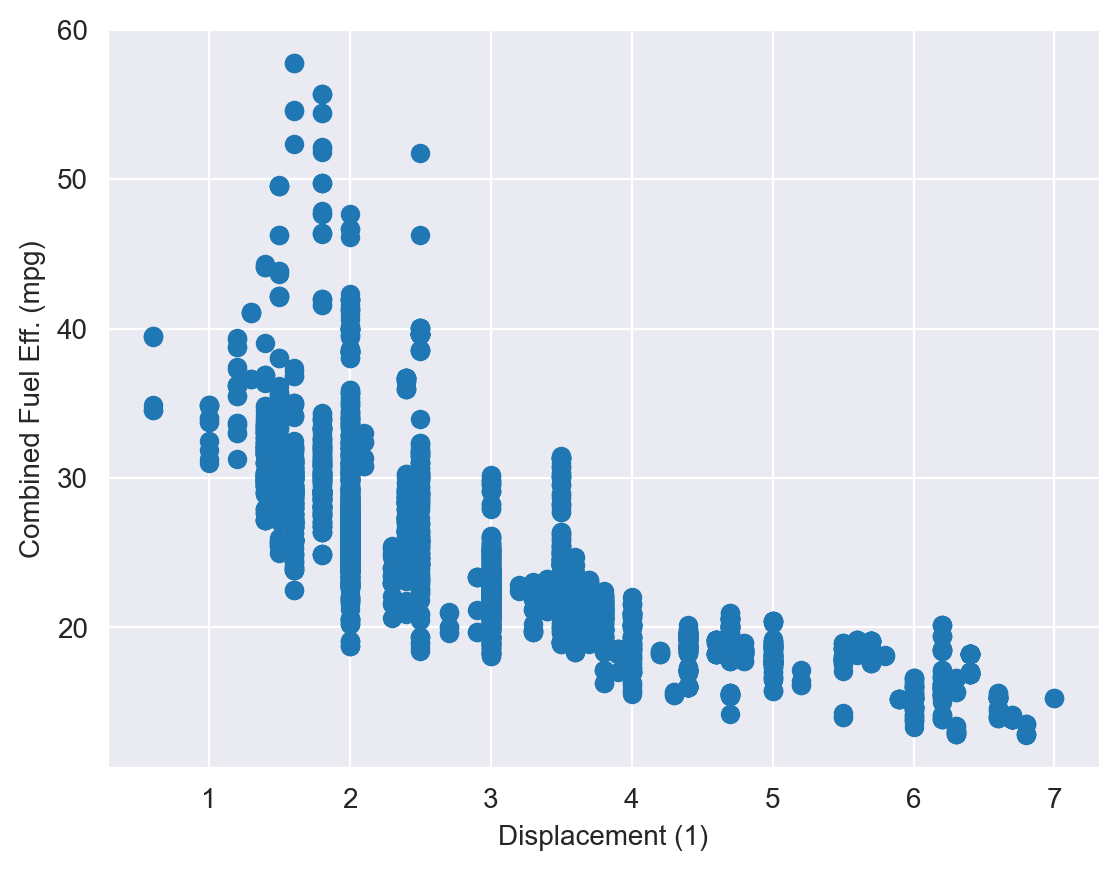

In [4]:
plt.scatter(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

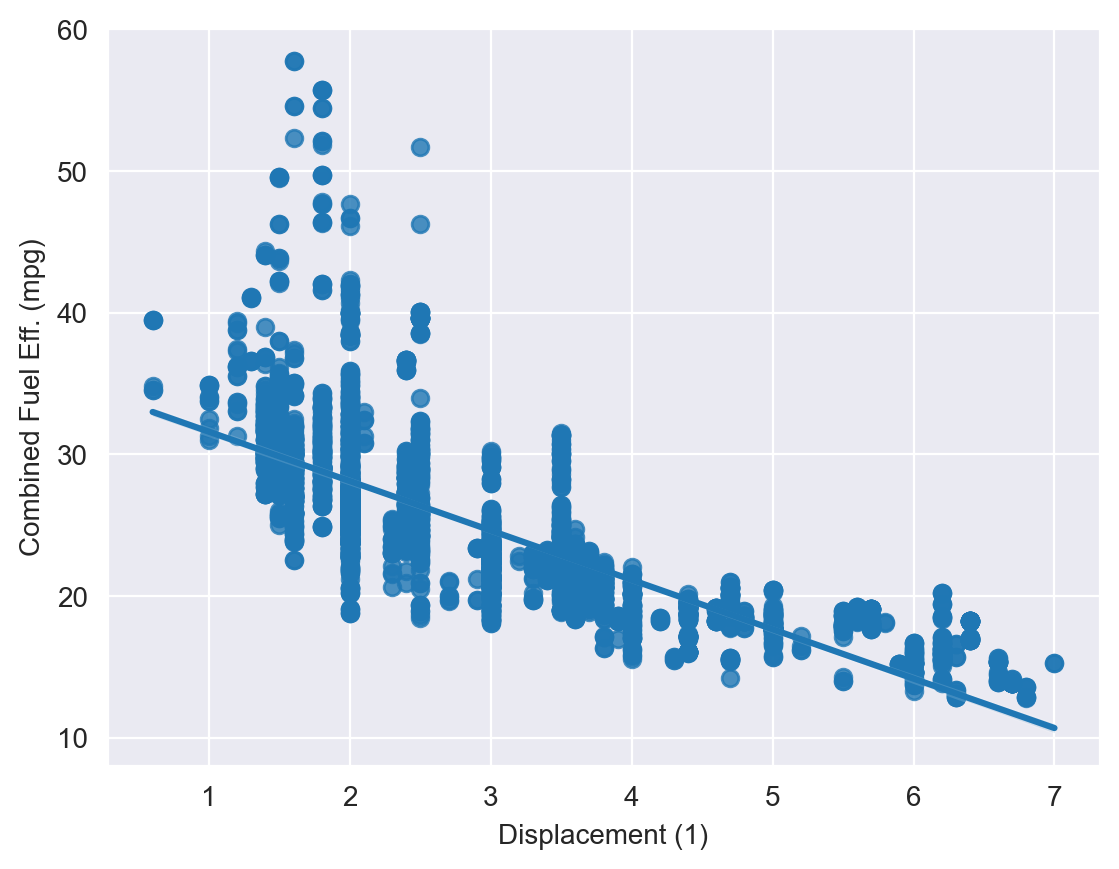

In [5]:
sns.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=True)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

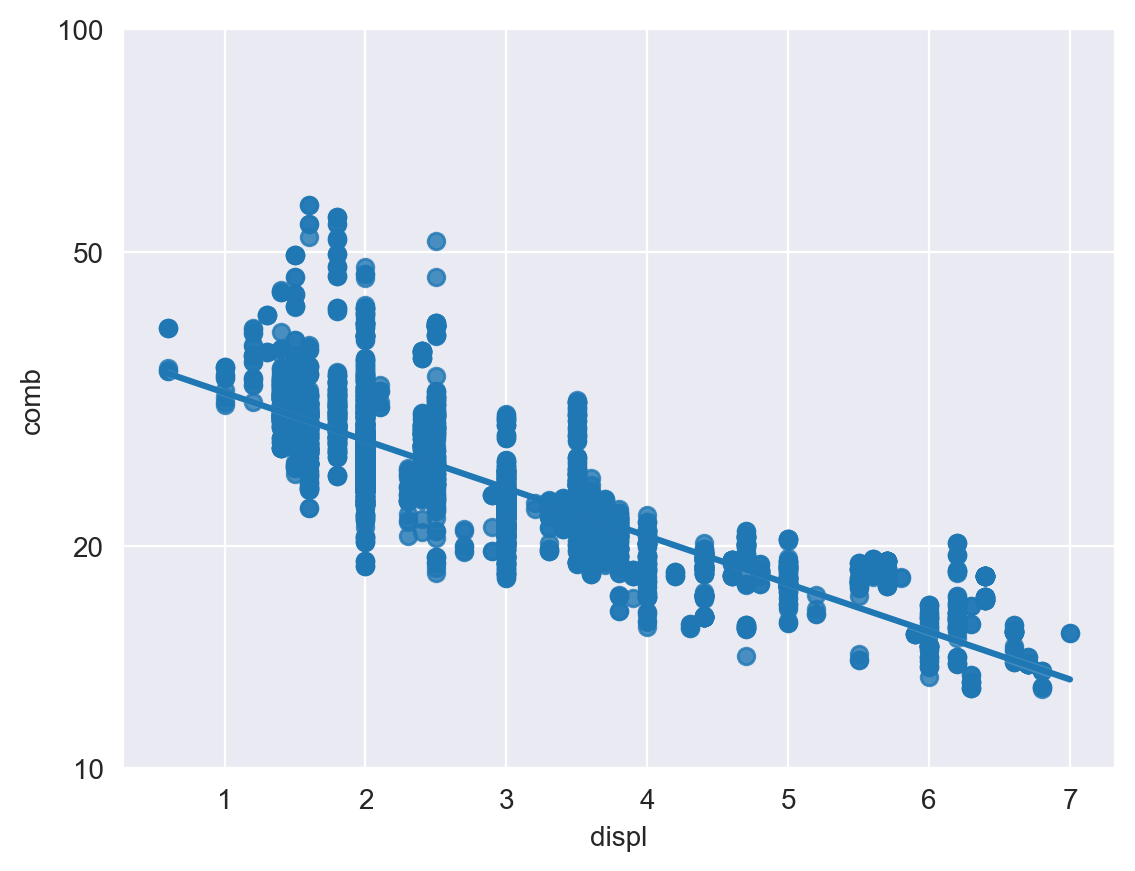

In [6]:
# Plot the regression line on the transformed data
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)


sns.regplot(data=fuel_econ, x=fuel_econ['displ'], y=fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

### Overplotting, Transparency, and Jitter

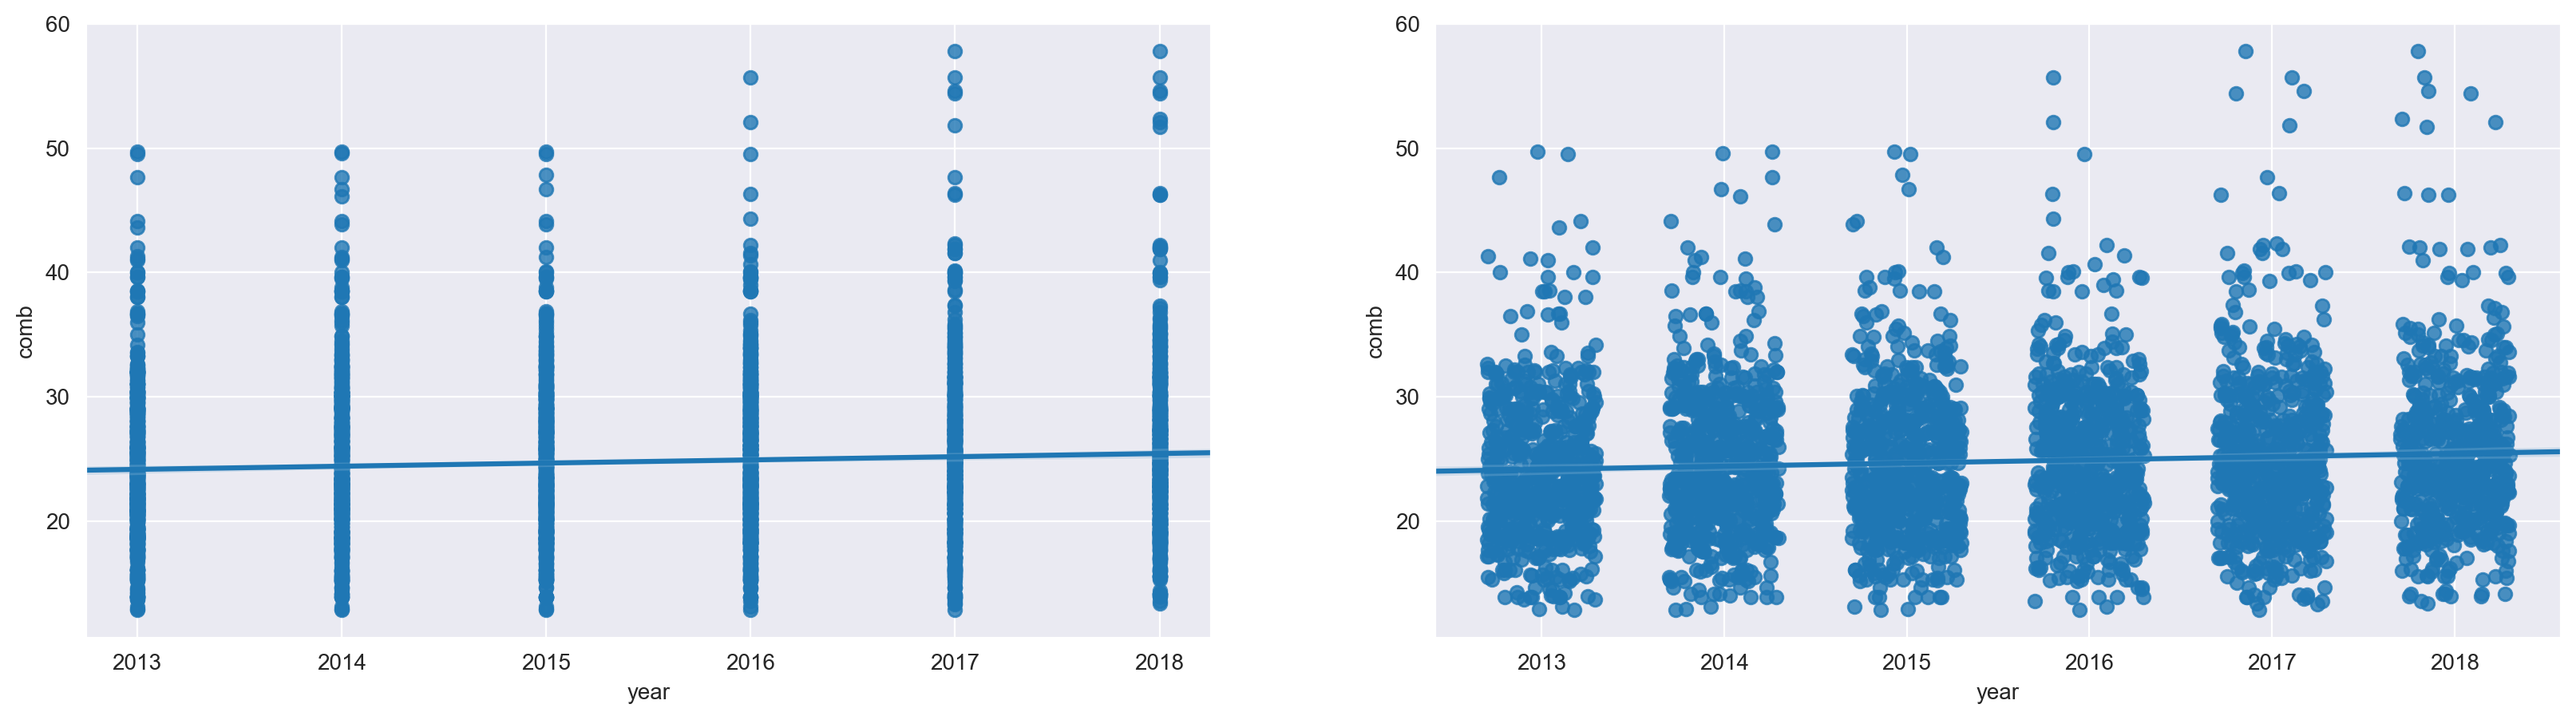

In [7]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
sns.regplot(data=fuel_econ, x='year', y='comb', truncate=False)
plt.subplot(1, 2, 2)
sns.regplot(data=fuel_econ, x='year', y='comb', truncate=False, x_jitter=0.3);

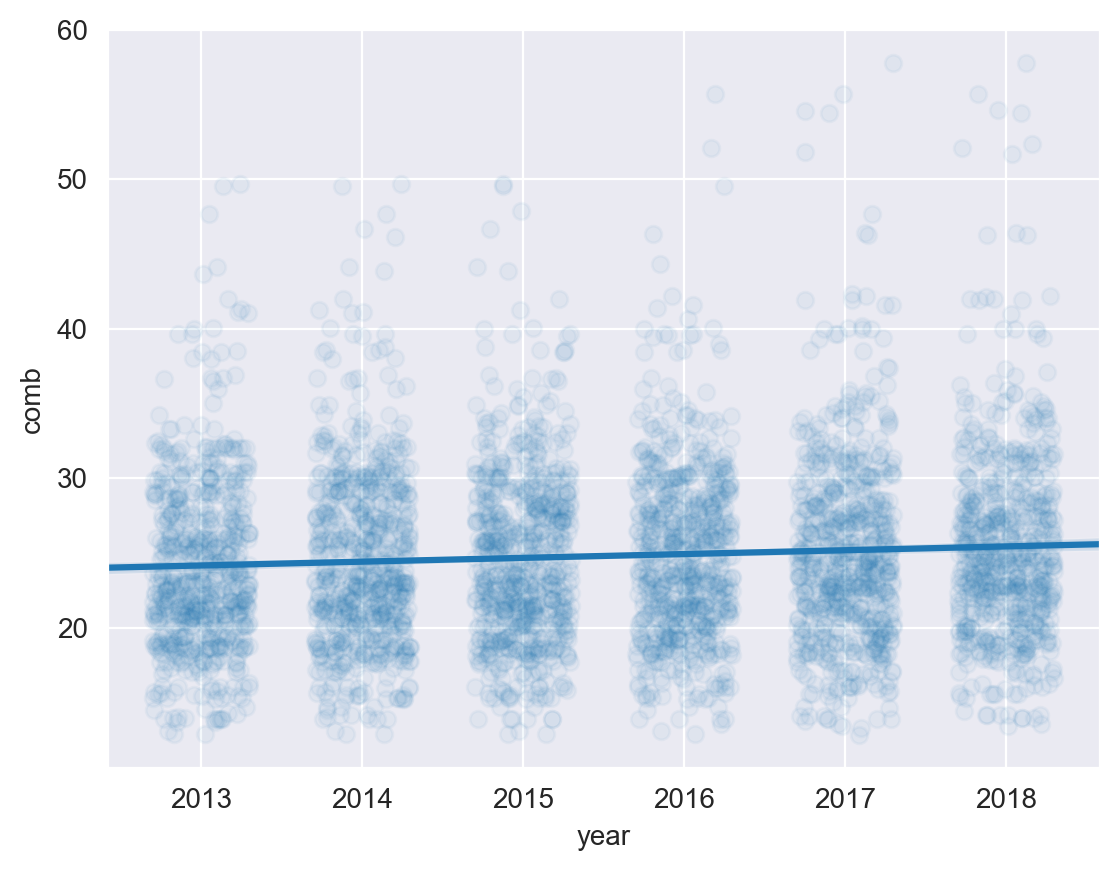

In [8]:
sns.regplot(data=fuel_econ, x='year', y='comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha': 1 / 20});

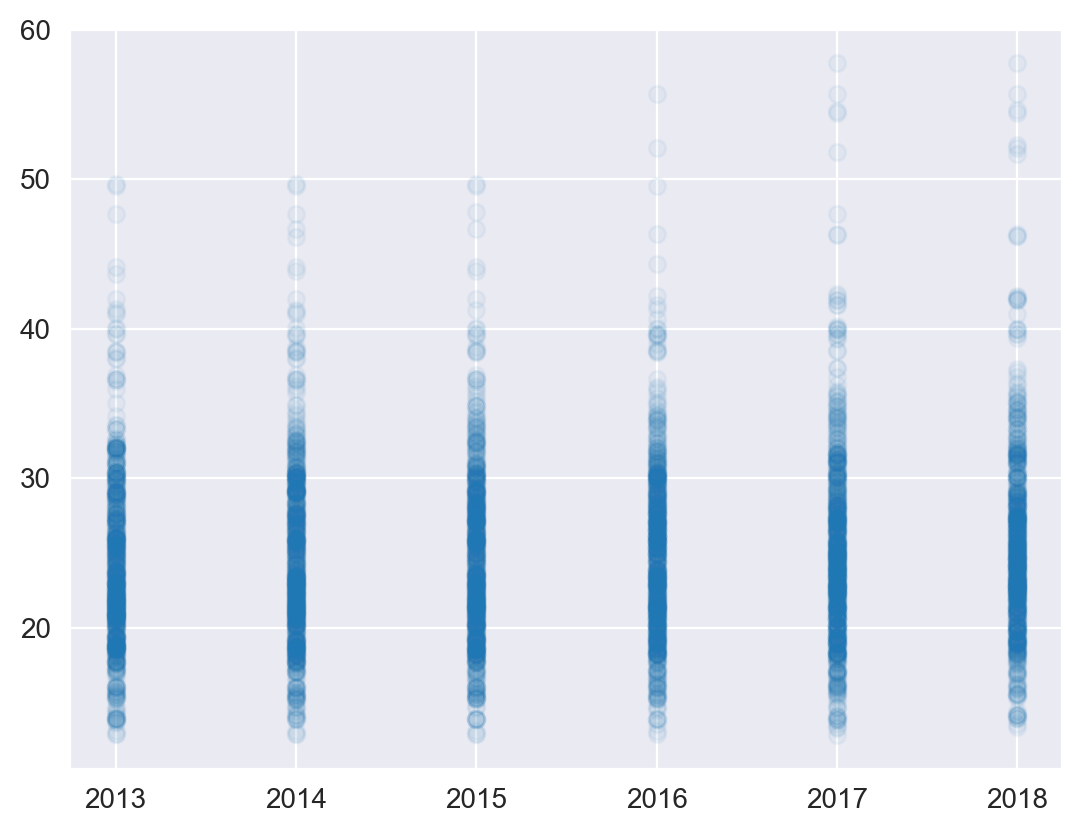

In [9]:
plt.scatter(data=fuel_econ, x='year', y='comb', alpha=1 / 20);

### Heat Maps

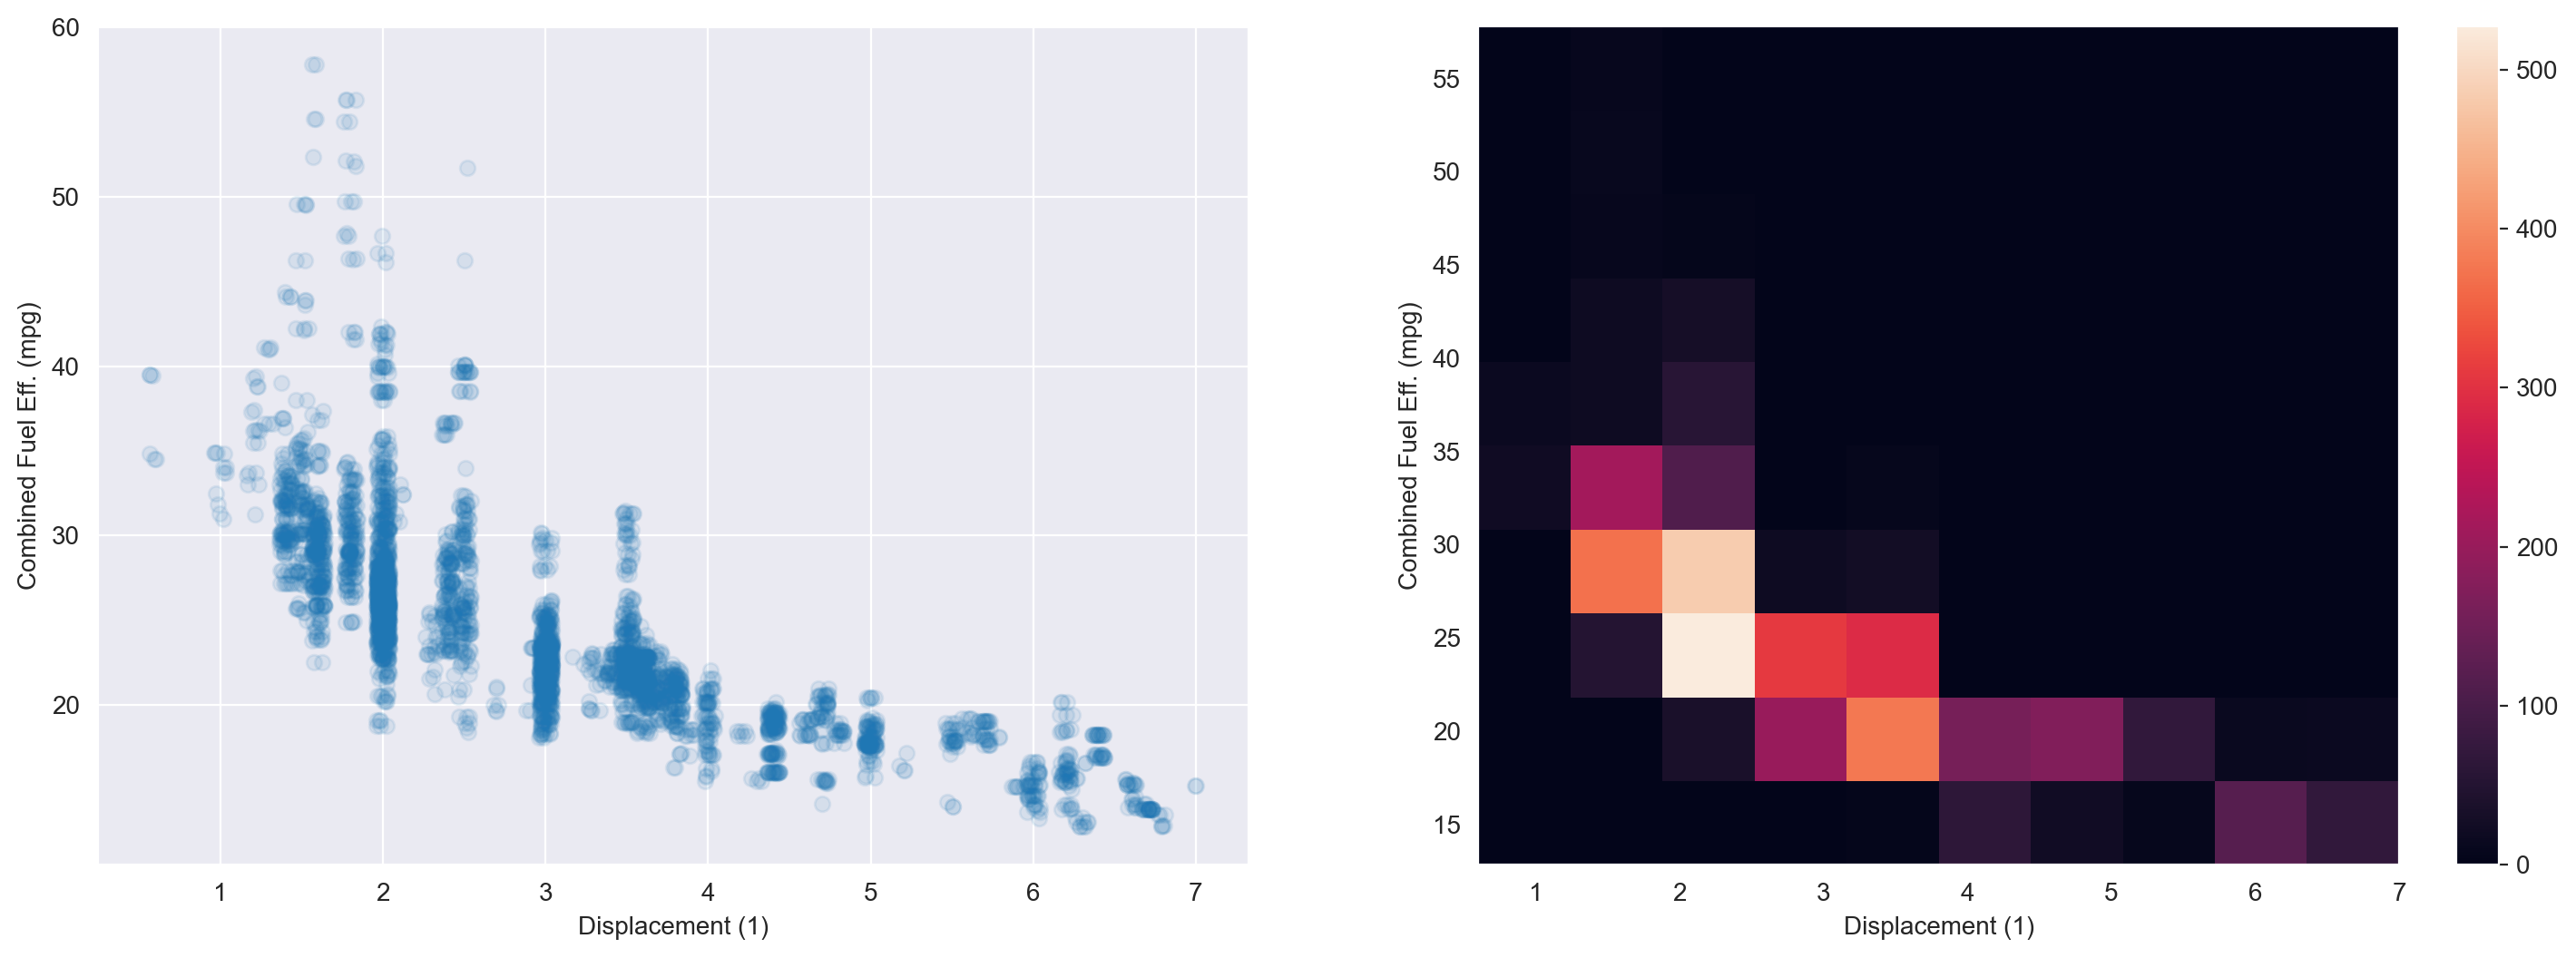

In [10]:
# A heat map is a 2-d version of the histogram
plt.figure(figsize=[18, 6])

plt.subplot(1, 2, 1)
sns.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=0.04, scatter_kws={'alpha': 1 / 10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

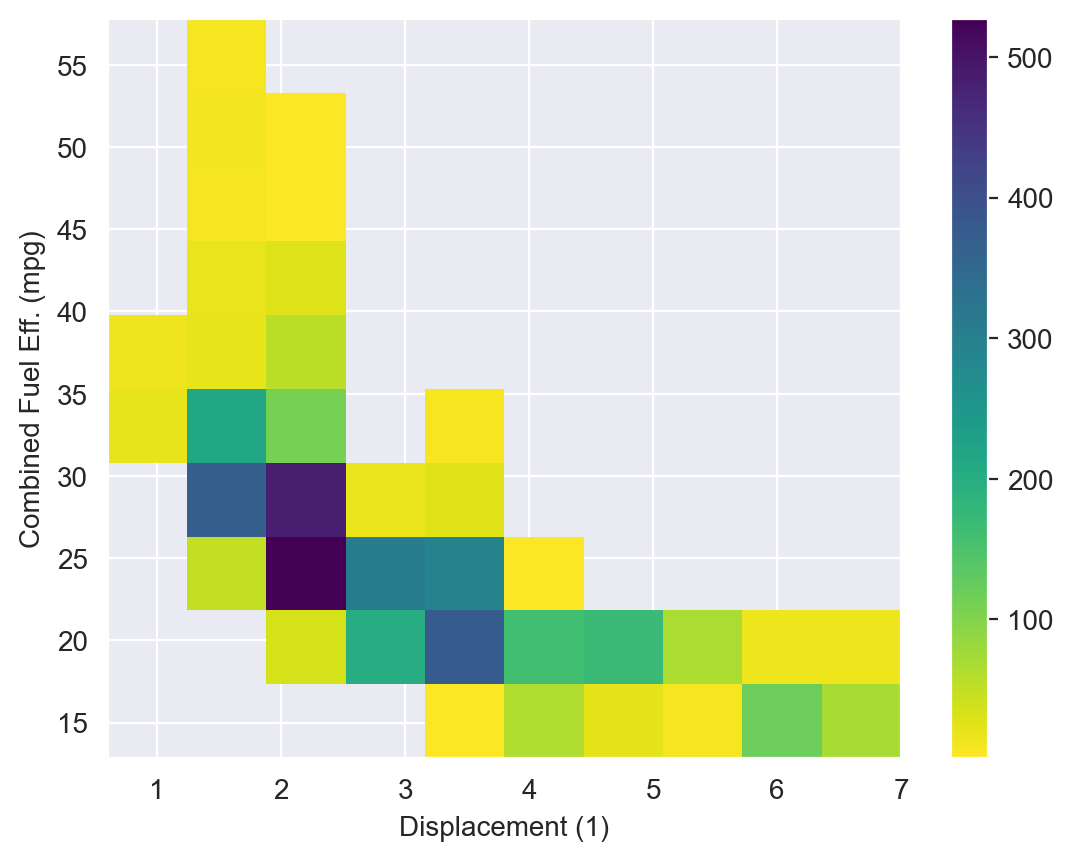

In [11]:
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [12]:
fuel_econ.describe()

id         year    cylinders        displ          pv2  \
count   3929.000000  3929.000000  3929.000000  3929.000000  3929.000000   
mean   36006.724357  2015.500891     5.468313     2.950573    23.660982   
std     2189.349923     1.694775     1.878319     1.305901    37.724901   
min    32204.000000  2013.000000     2.000000     0.600000     0.000000   
25%    34087.000000  2014.000000     4.000000     2.000000     0.000000   
50%    36020.000000  2015.000000     5.000000     2.500000     0.000000   
75%    37935.000000  2017.000000     6.000000     3.600000    70.000000   
max    39901.000000  2018.000000    12.000000     7.000000   102.000000   

               pv4         city        UCity      highway     UHighway  \
count  3929.000000  3929.000000  3929.000000  3929.000000  3929.000000   
mean     59.239247    21.830462    28.044011    29.973842    42.850295   
std      48.667549     6.246273     9.087195     5.747571     9.100423   
min       0.000000    10.540200    12.900000    16.559400    21.800000   
25%       0.000000    17.746900    22.200000    25.754200    36.000000   
50%      91.000000    20.823200    26.400000    29.633800    42.200000   
75%     100.000000    24.981400    32.264800    33.773100    48.900000   
max     127.000000    57.808800    83.559800    59.416900    79.100000   

              comb          co2      feScore     ghgScore  
count  3929.000000  3929.000000  3929.000000  3929.000000  
mean     24.791339   376.564266     5.668872     5.659201  
std       6.003246    92.338892     1.755860     1.754589  
min      12.821700    29.000000     1.000000     1.000000  
25%      20.658100   315.000000     5.000000     5.000000  
50%      24.000000   369.000000     5.000000     5.000000  
75%      28.227100   429.000000     7.000000     7.000000  
max      57.782400   692.000000    10.000000    10.000000

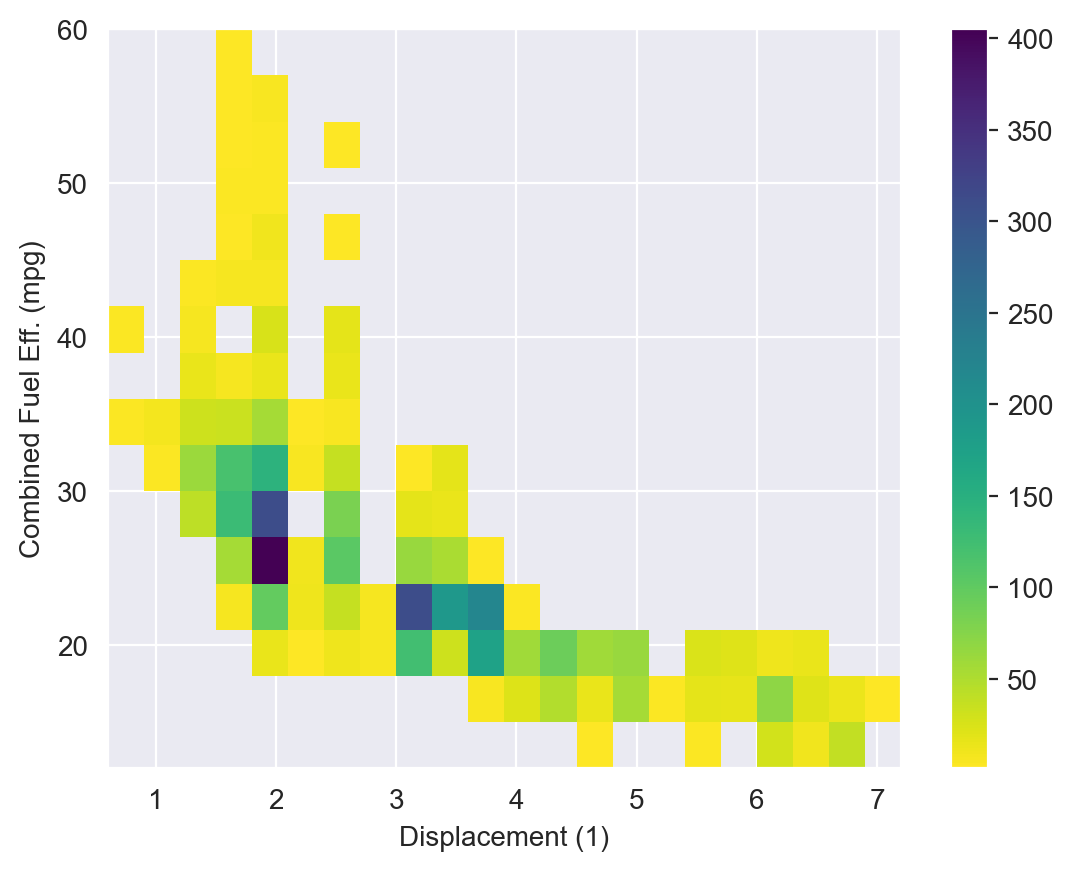

In [13]:
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

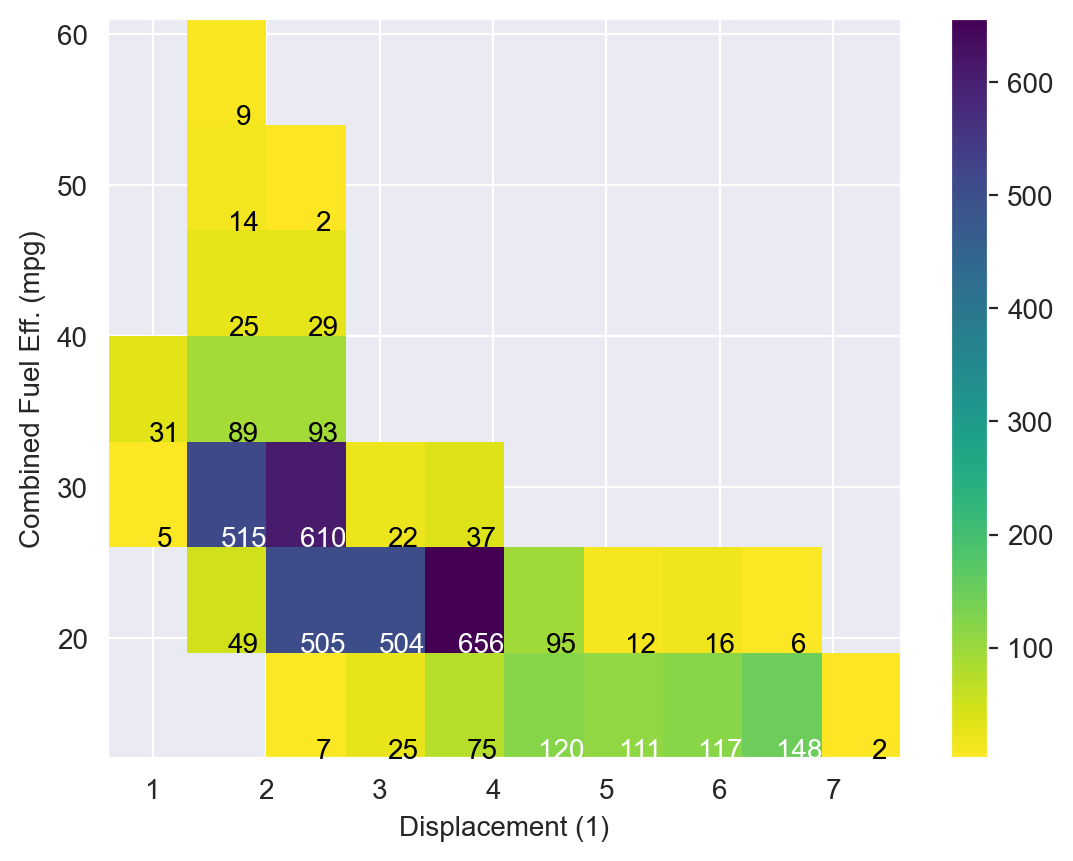

In [14]:
bins_x = np.arange(0.6, 7 + 0.7, 0.7)
bins_y = np.arange(12, 58 + 7, 7)
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 100:  # increase visibility on darker cells
            plt.text(bins_x[i] + 0.5, bins_y[j] + 0.5, int(c), ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i] + 0.5, bins_y[j] + 0.5, int(c), ha='center', va='center', color='black')

### Violin Plots

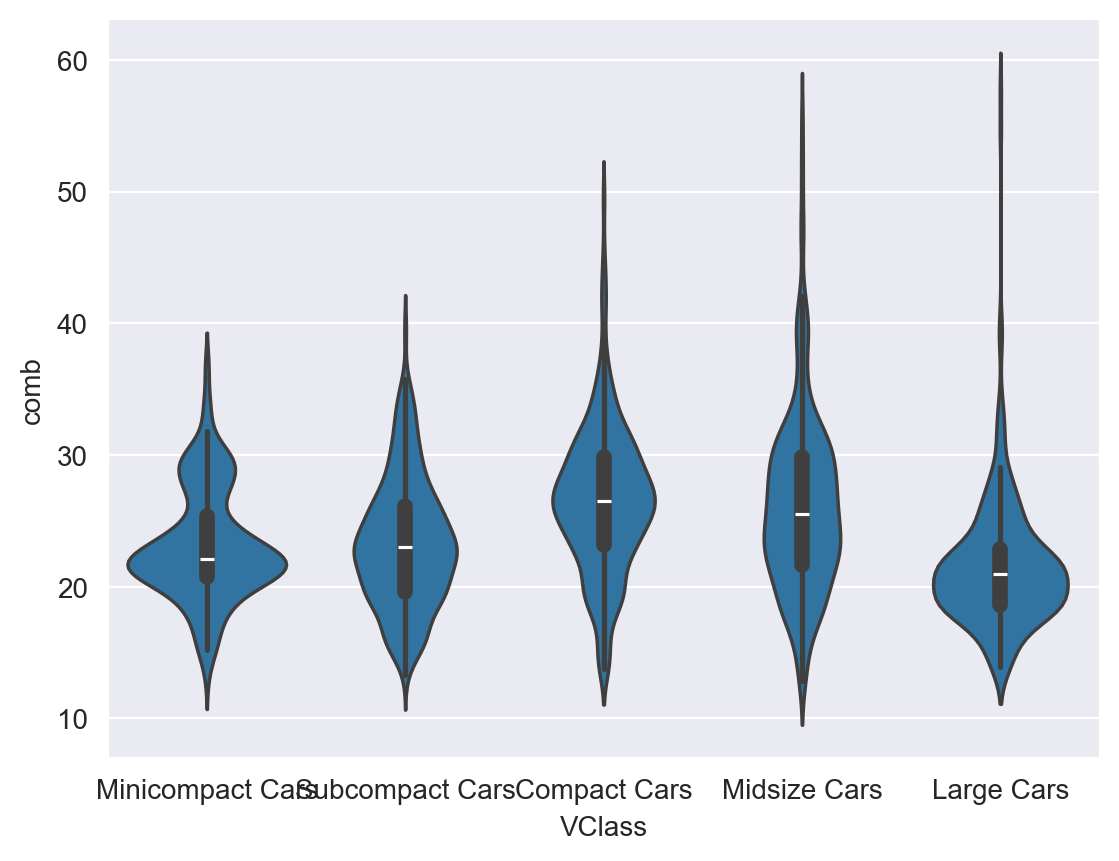

In [15]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

sns.violinplot(data=fuel_econ, x='VClass', y='comb');

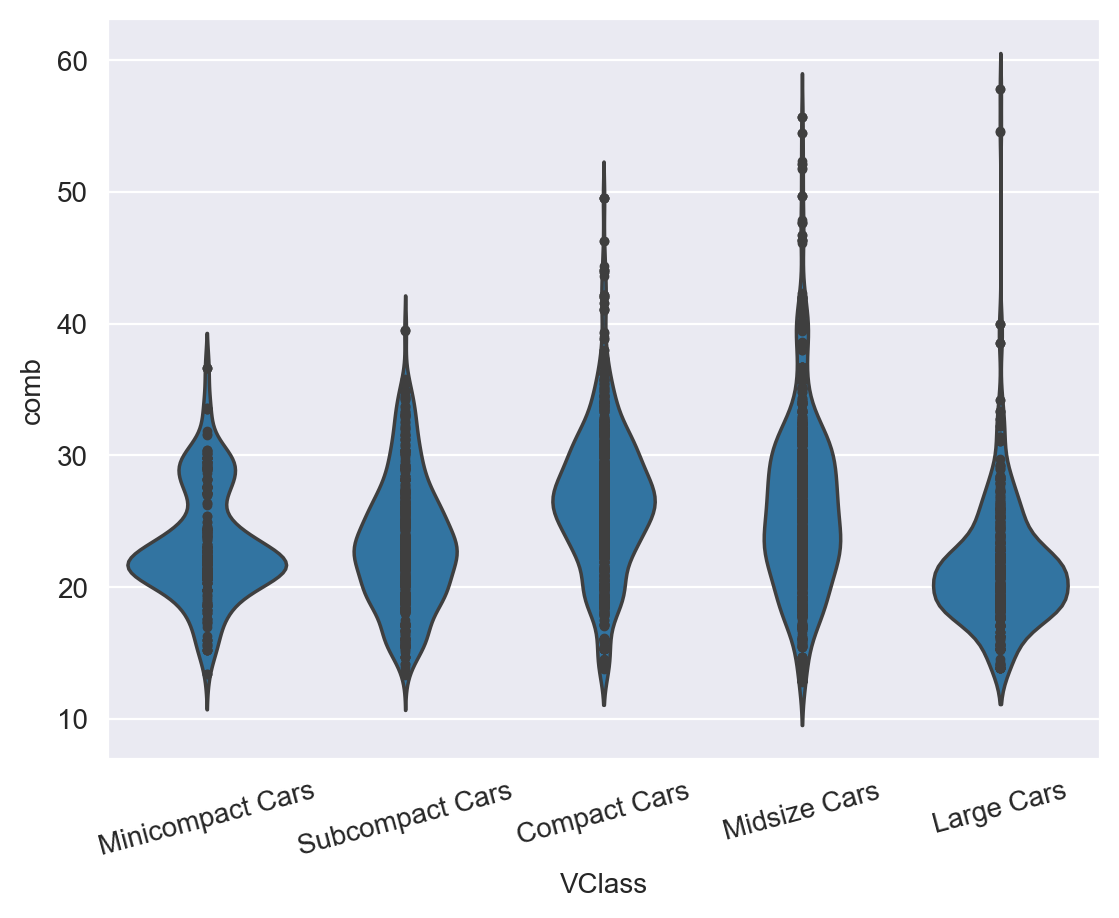

In [16]:
base_color = sns.color_palette()[0]
# inner can take any value from {“box”, “quartile”, “point”, “stick”, None}
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='point')
plt.xticks(rotation=15);

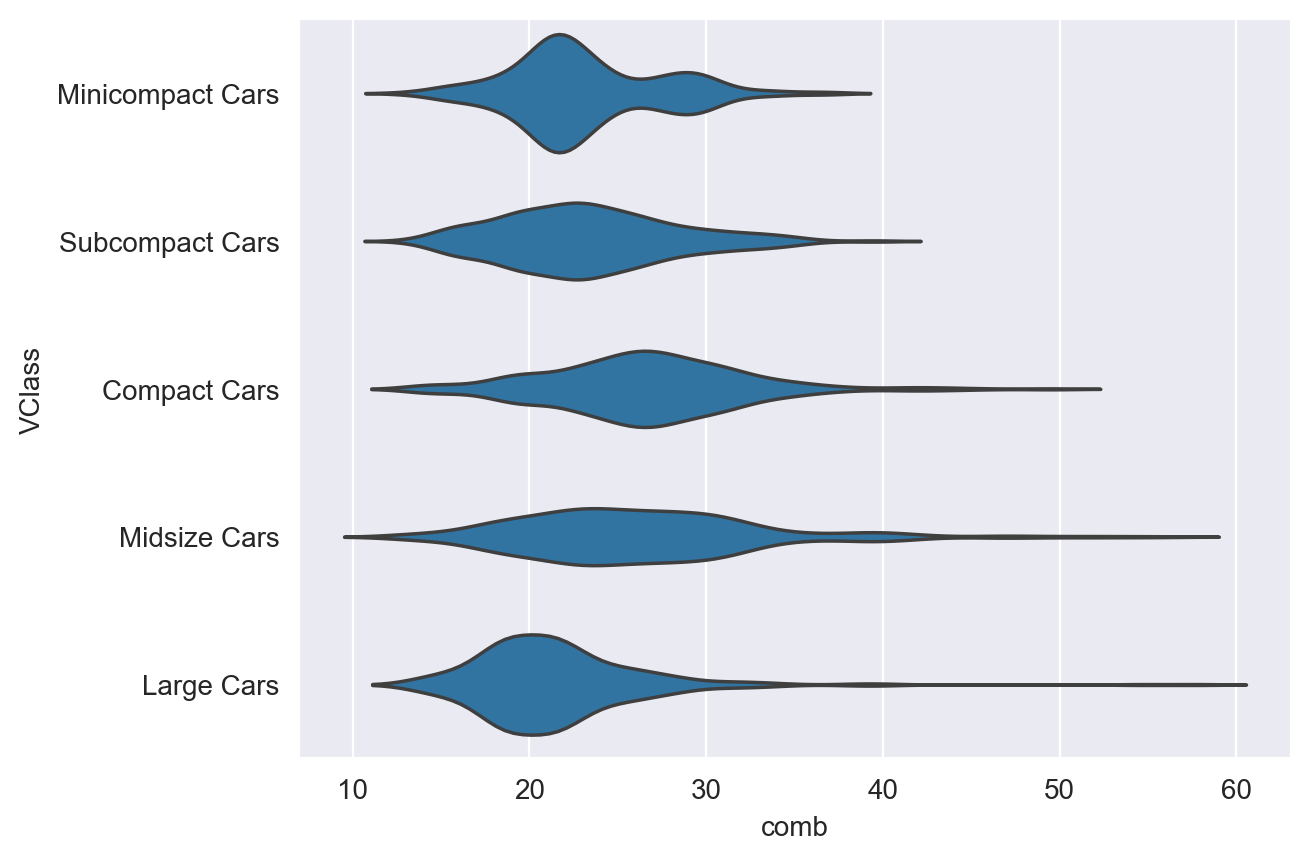

In [17]:
sns.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, inner=None);

### Box Plots

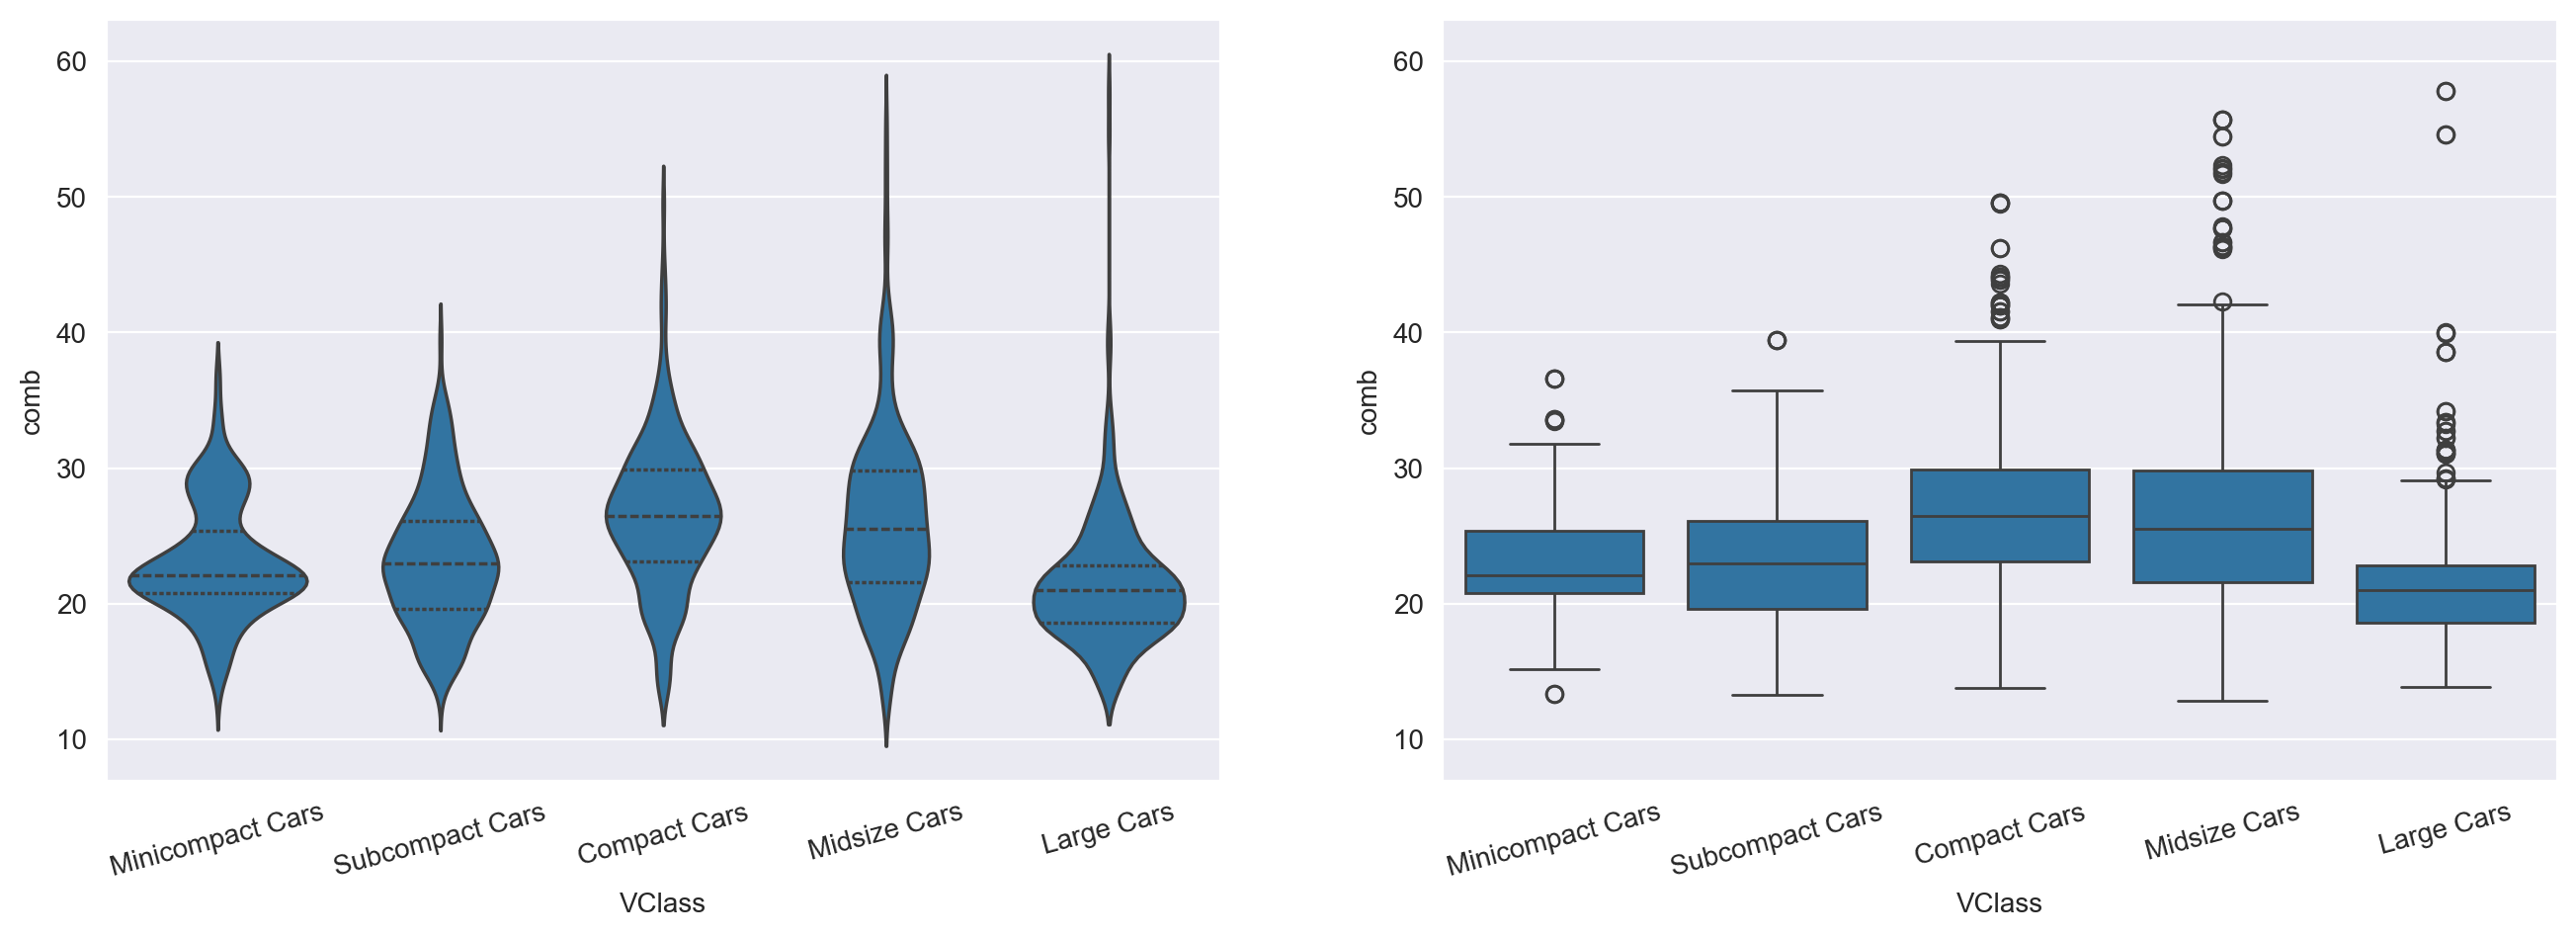

In [18]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

plt.figure(figsize=[16, 5])
base_color = sns.color_palette()[0]

plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim());  # set y-axis limits to be same as left plot

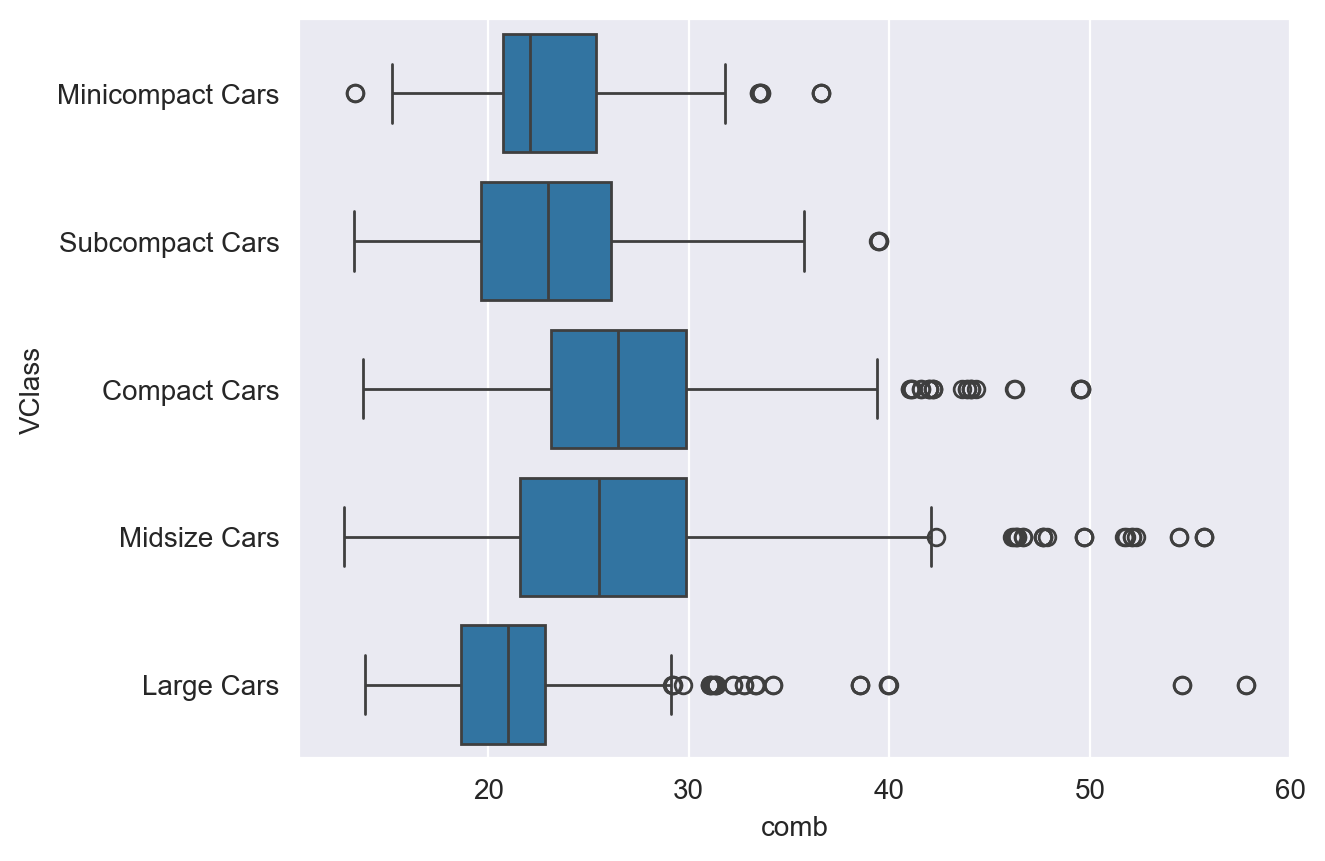

In [19]:
sns.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color);

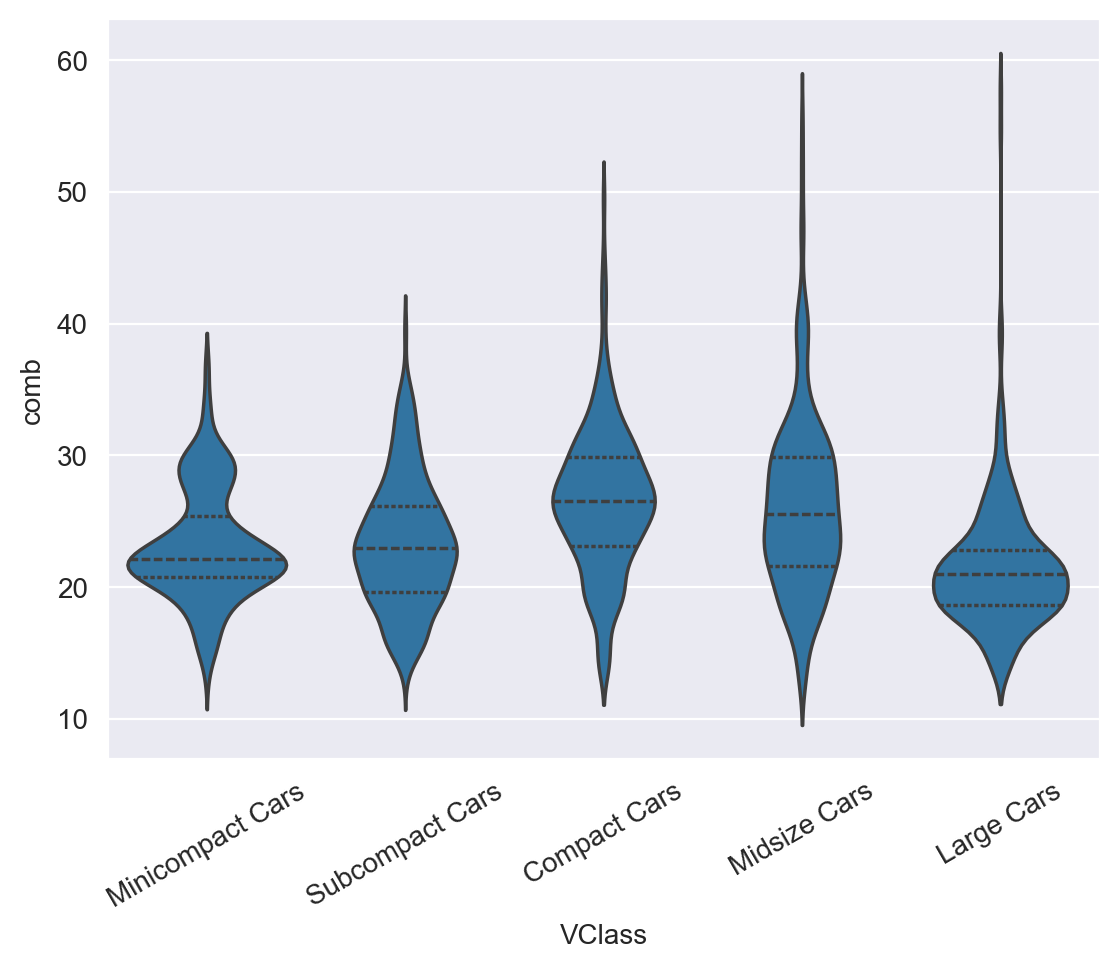

In [20]:
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

### Clustered Bar Charts

In [21]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [22]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
fuel_econ.head()

id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   

   ...  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0  ...    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4   
1  ...    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6   
2  ...    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5   
3  ...    0  16.9415  20.5000  25.2190   33.5000  19.8774  446        5   
4  ...   95  24.7726  31.9796  35.5340   51.8816  28.6813  310        8   

   ghgScore  trans_type  
0         4   Automatic  
1         6   Automatic  
2         5   Automatic  
3         5   Automatic  
4         8   Automatic  

[5 rows x 21 columns]

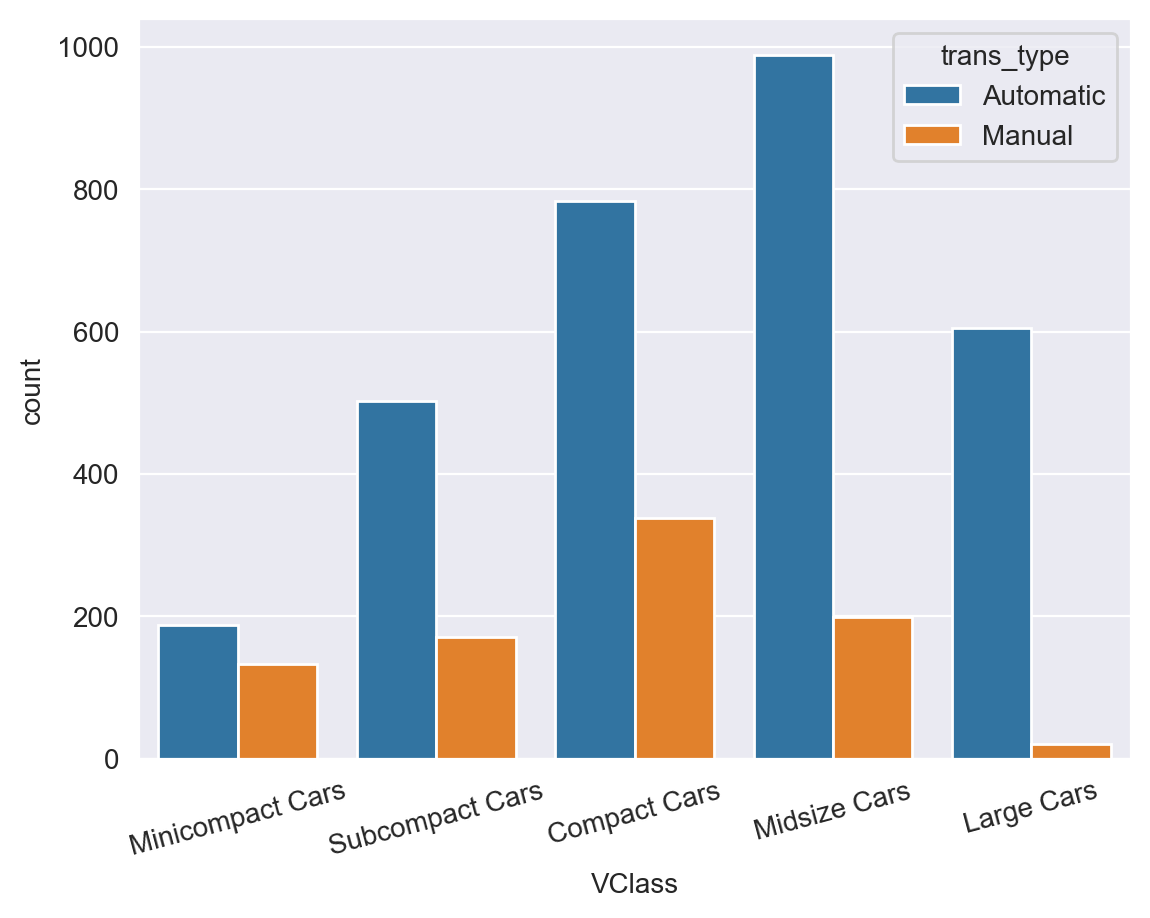

In [23]:
sns.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=15);

In [24]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type'], observed=True).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [25]:
ct_counts = ct_counts.reset_index(name='count')
ct_counts

VClass trans_type  count
0  Minicompact Cars  Automatic    188
1  Minicompact Cars     Manual    133
2   Subcompact Cars  Automatic    502
3   Subcompact Cars     Manual    171
4      Compact Cars  Automatic    784
5      Compact Cars     Manual    338
6      Midsize Cars  Automatic    989
7      Midsize Cars     Manual    199
8        Large Cars  Automatic    605
9        Large Cars     Manual     20

In [26]:
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type        Automatic  Manual
VClass                             
Minicompact Cars        188     133
Subcompact Cars         502     171
Compact Cars            784     338
Midsize Cars            989     199
Large Cars              605      20

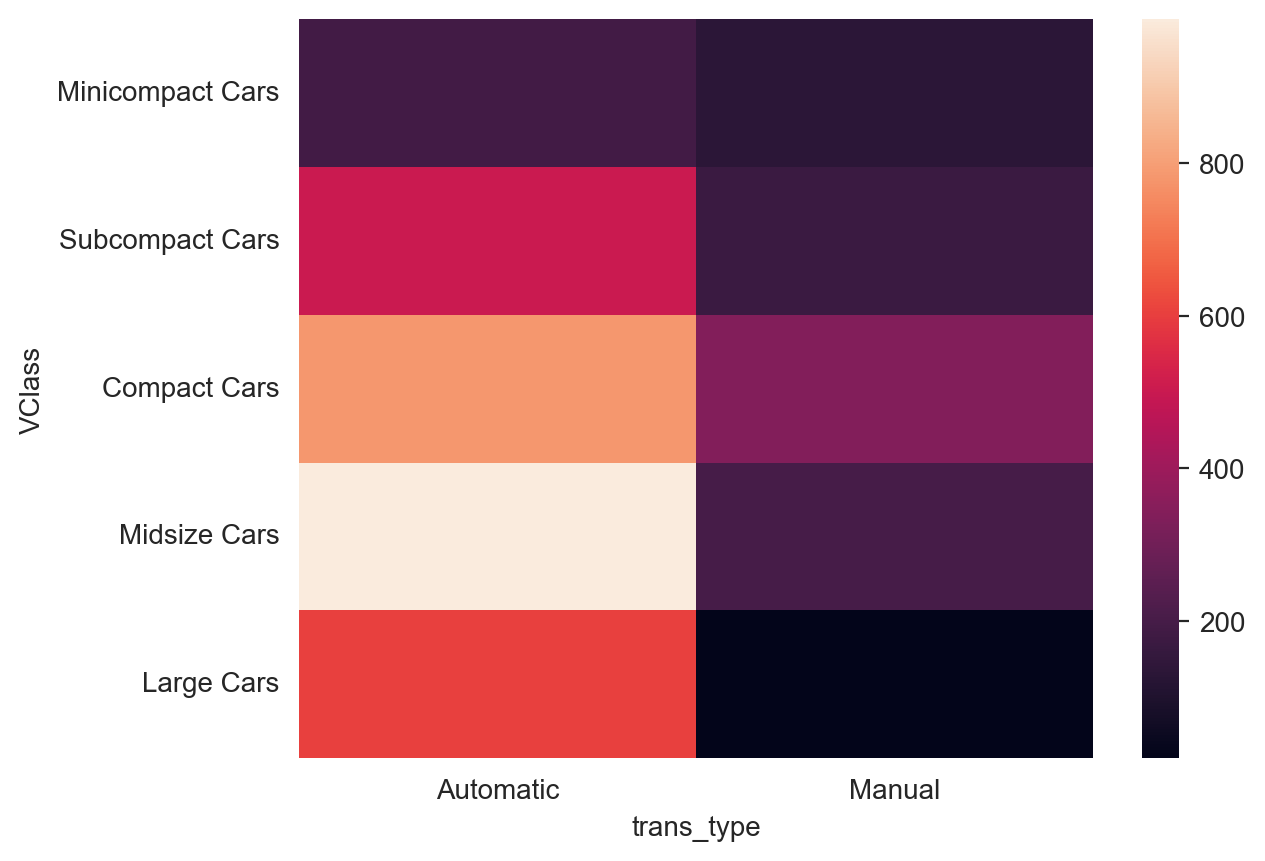

In [27]:
sns.heatmap(ct_counts);

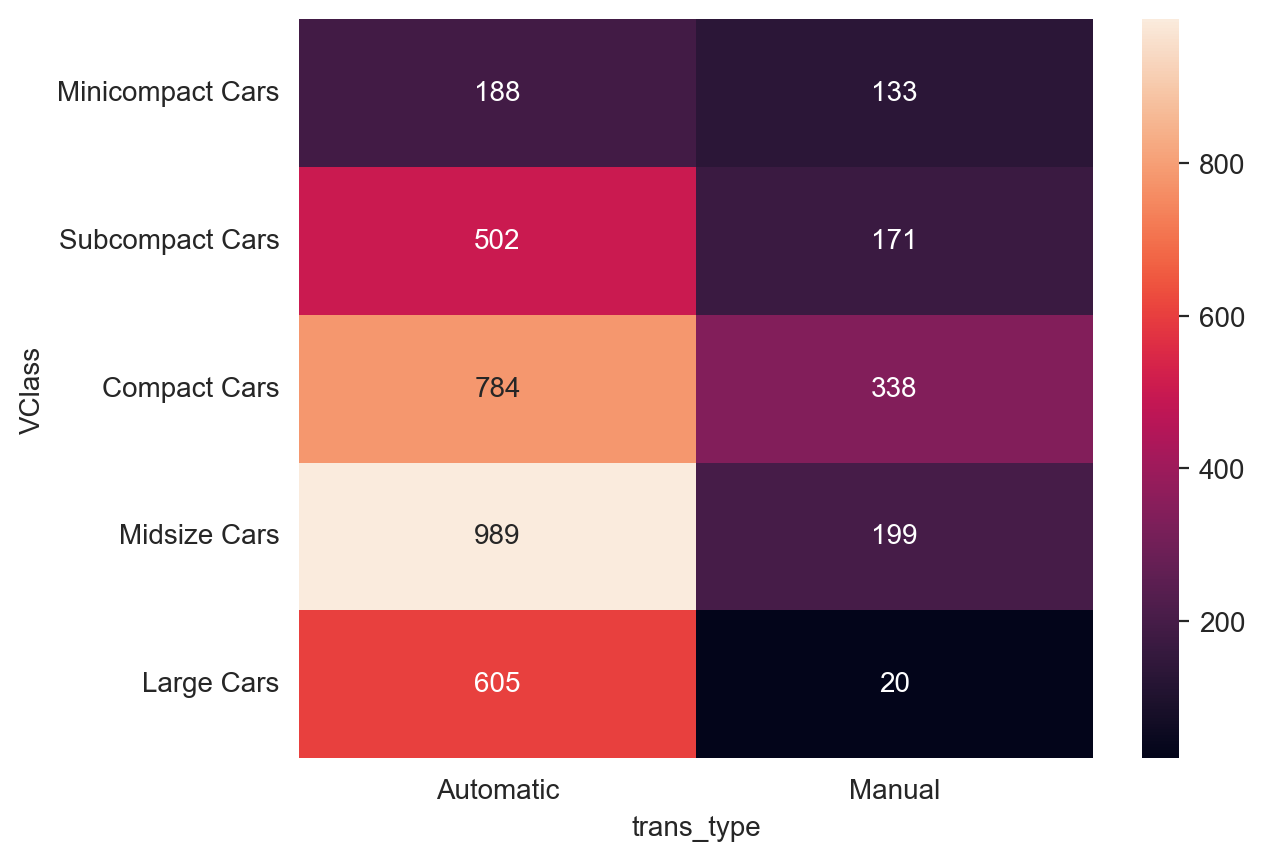

In [28]:
sns.heatmap(ct_counts, annot=True, fmt='d');

### Faceting

In [29]:
# In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall.

In [30]:
# make sure use the same axis proportions sharey=False -> True

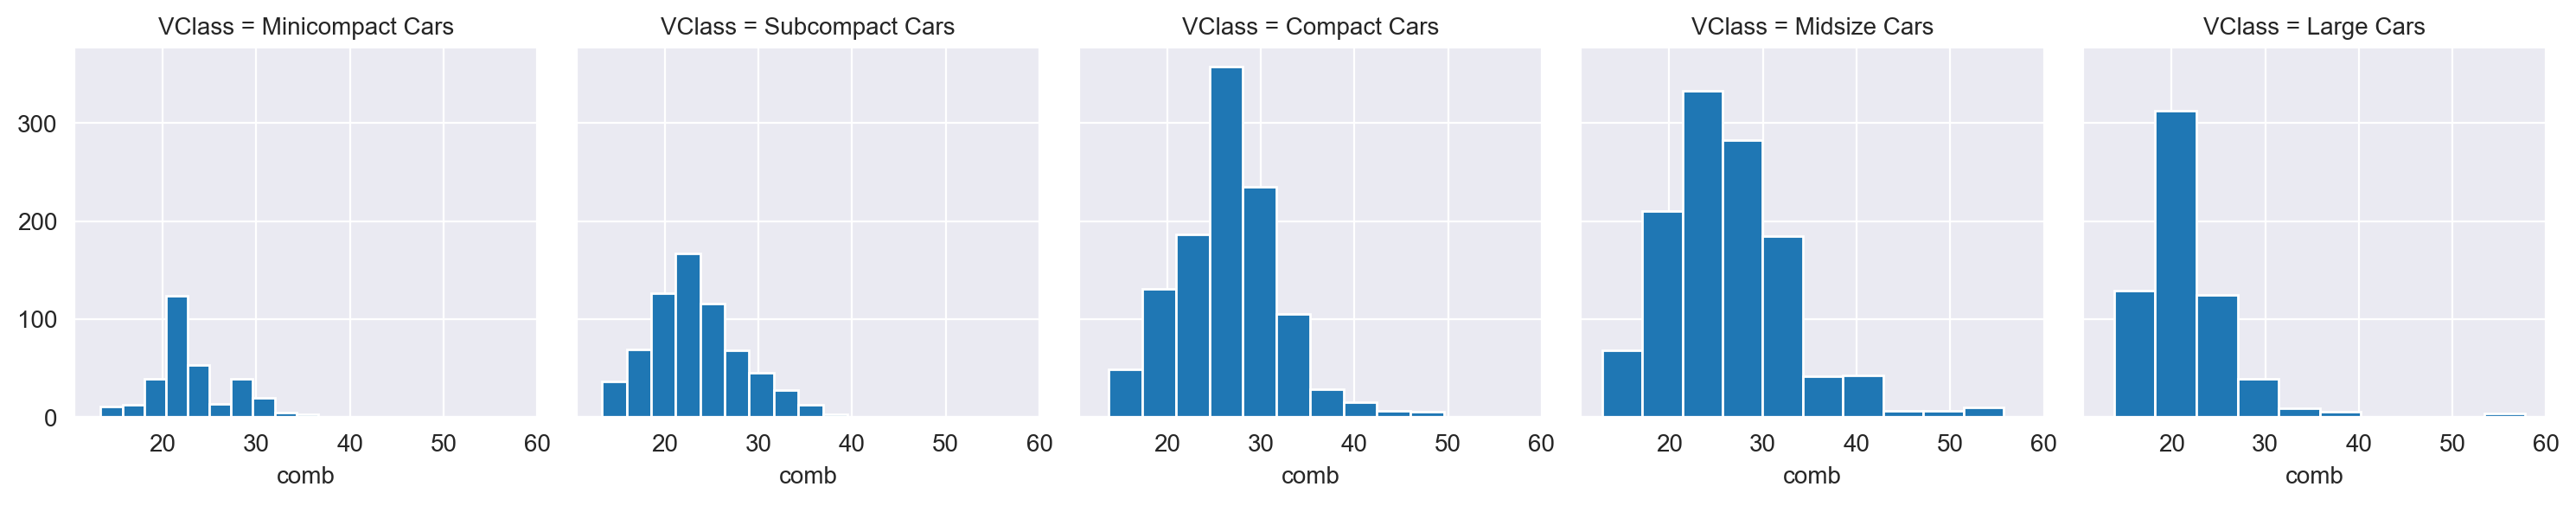

In [31]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

g = sns.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, "comb");

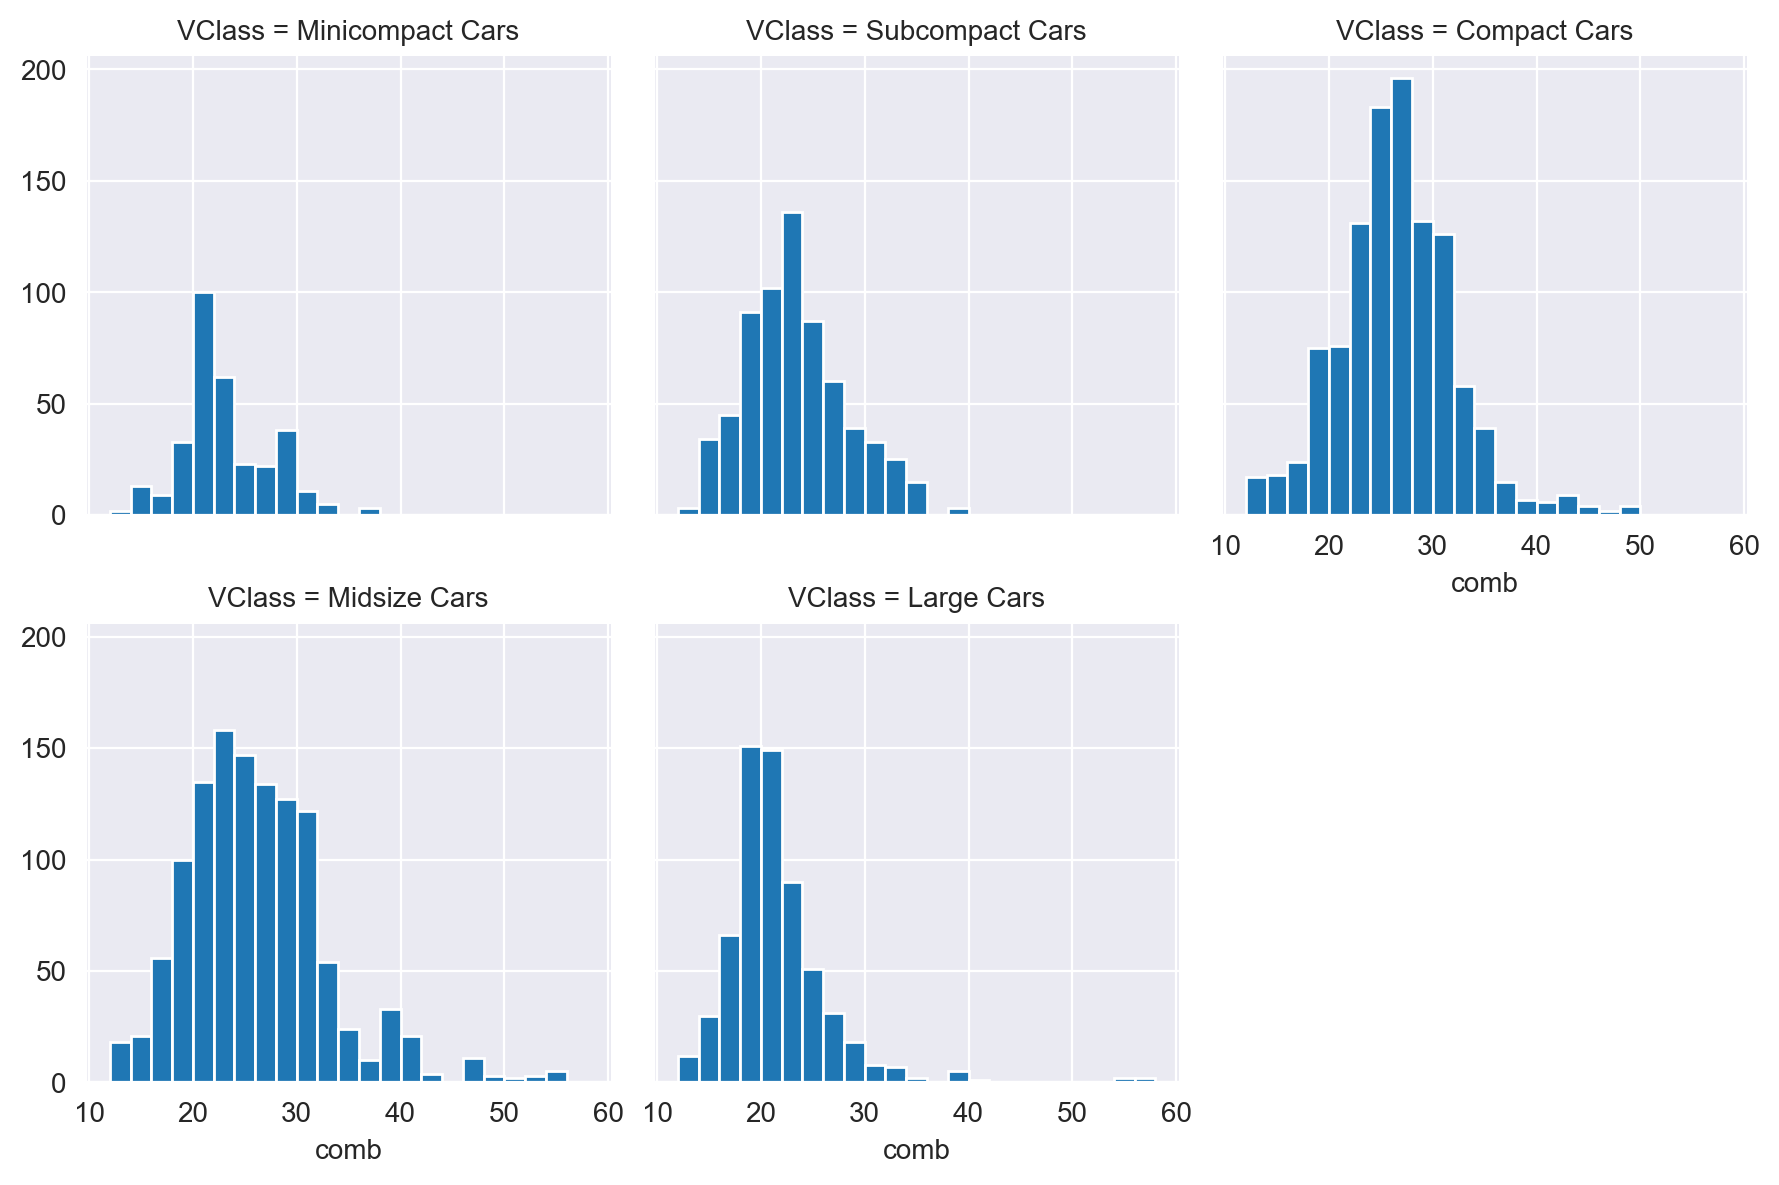

In [32]:
bin_edges = np.arange(12, 58 + 2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3, sharey=True)
g.map(plt.hist, 'comb', bins=bin_edges);

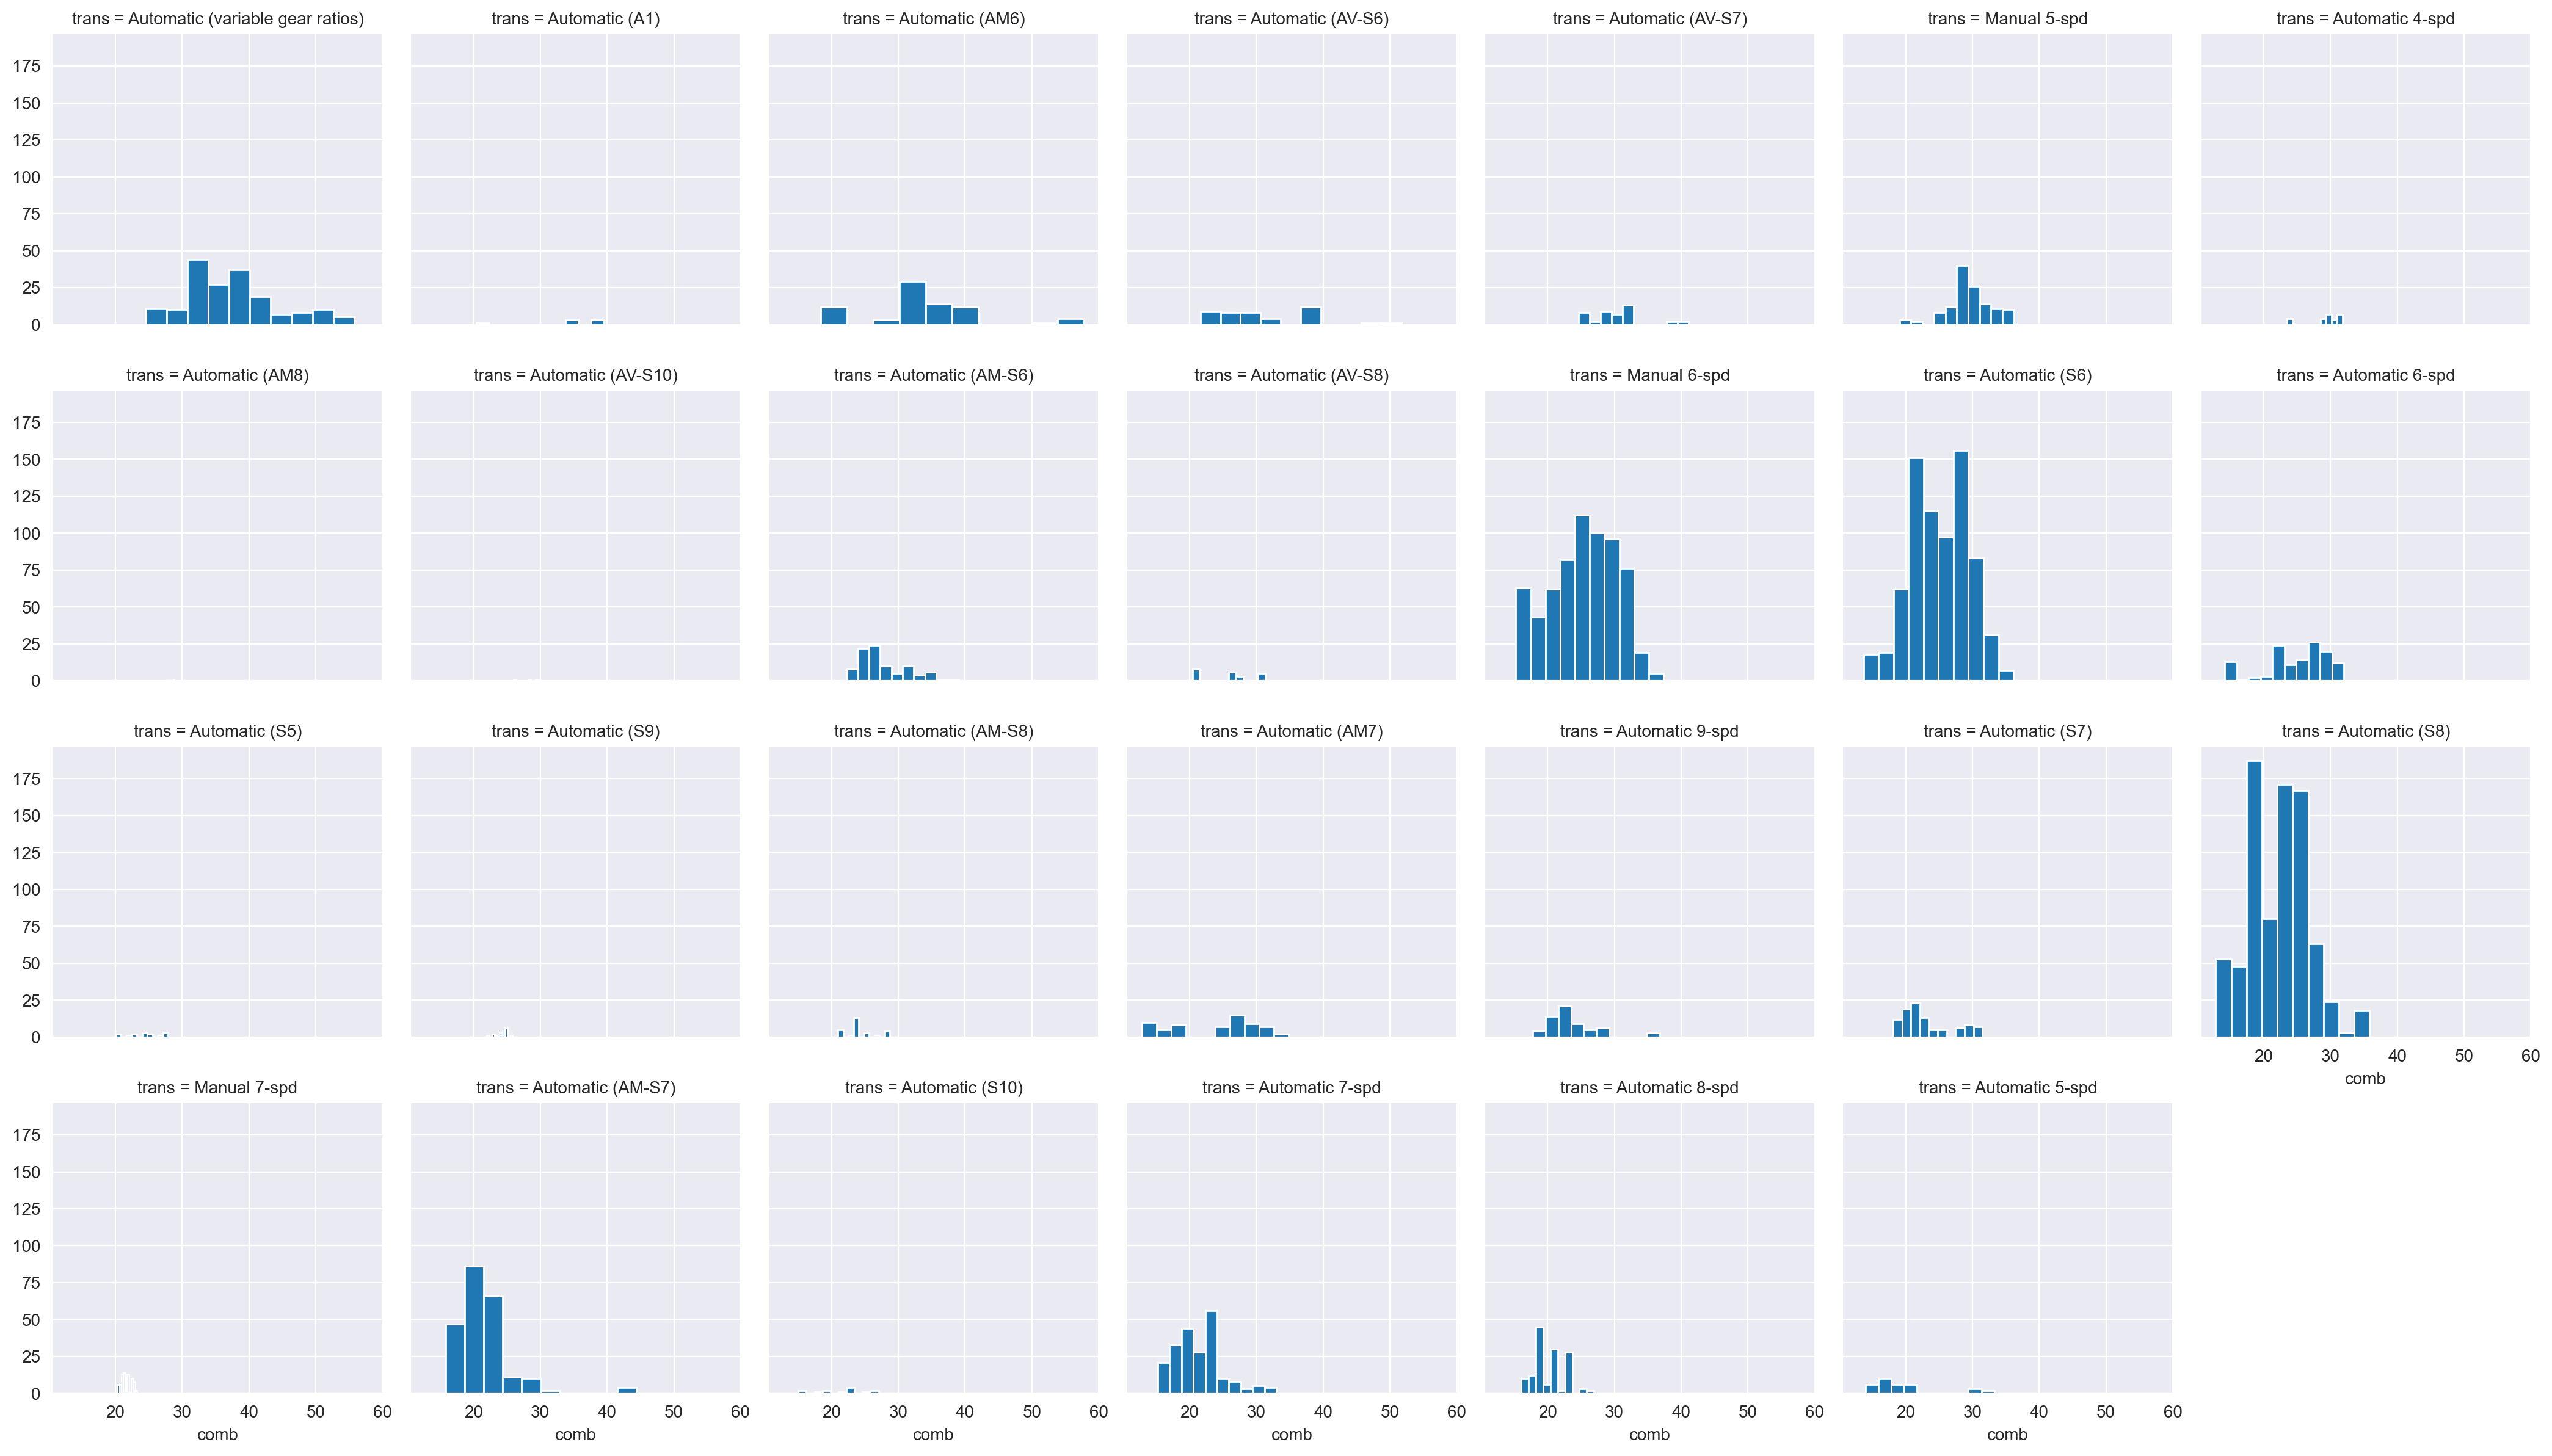

In [33]:
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_order = group_means.sort_values(['comb'], ascending=False).index

g = sns.FacetGrid(data=fuel_econ, col='trans', col_wrap=7, col_order=group_order)
g.map(plt.hist, 'comb');

### Adaptation of Univariate Plots

In [34]:
# These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable

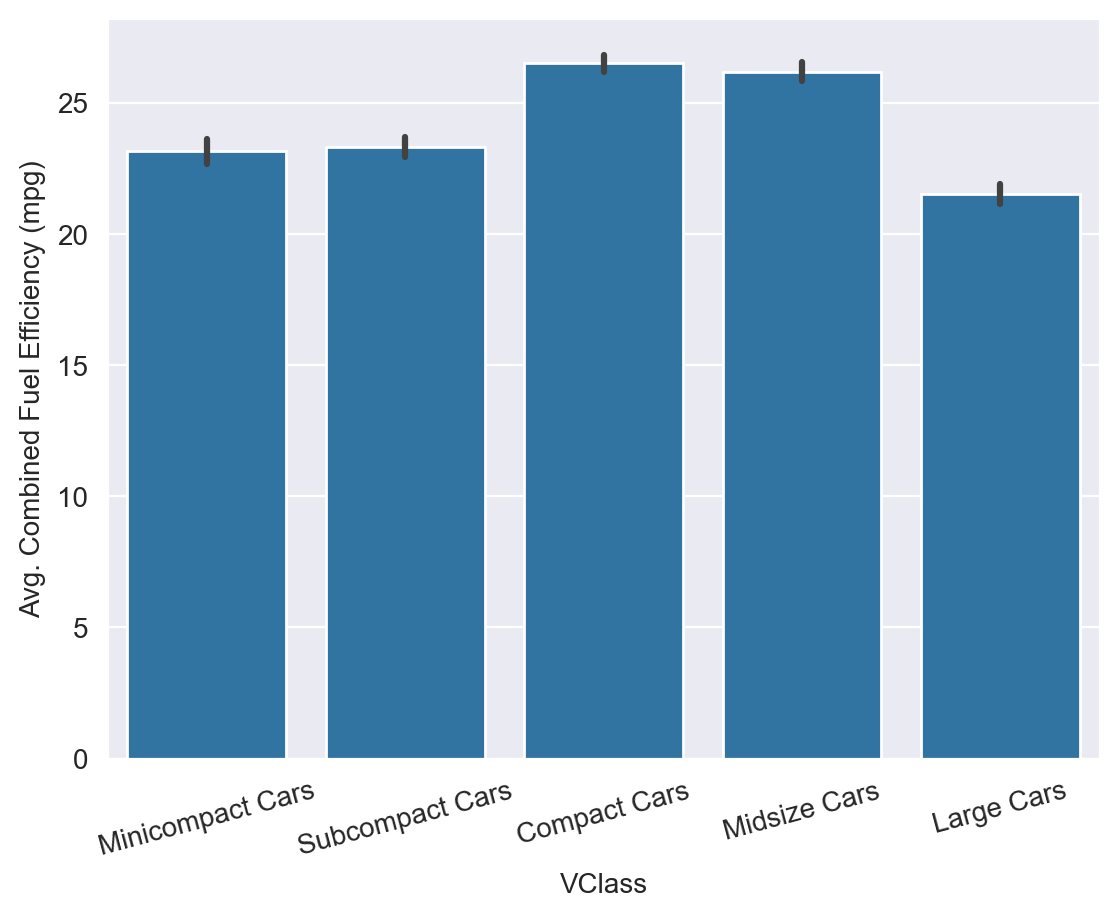

In [35]:
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

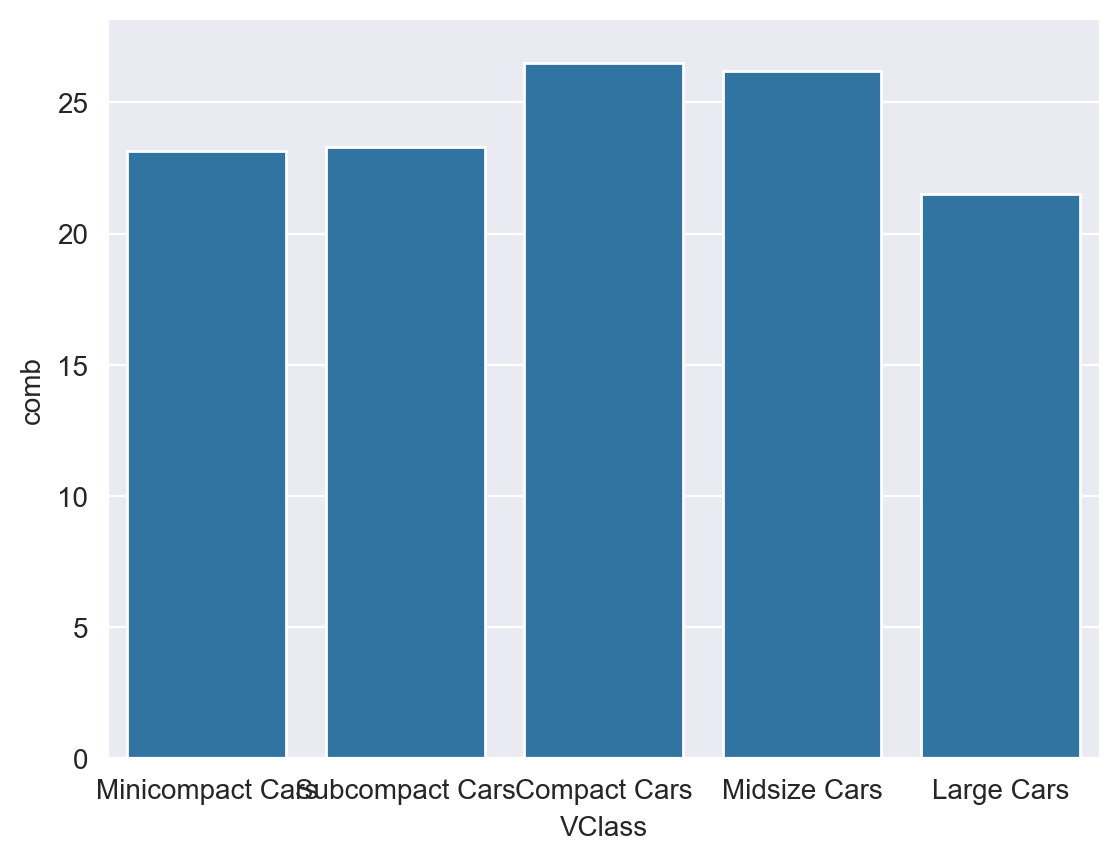

In [36]:
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, err_kws={'linewidth': 0});

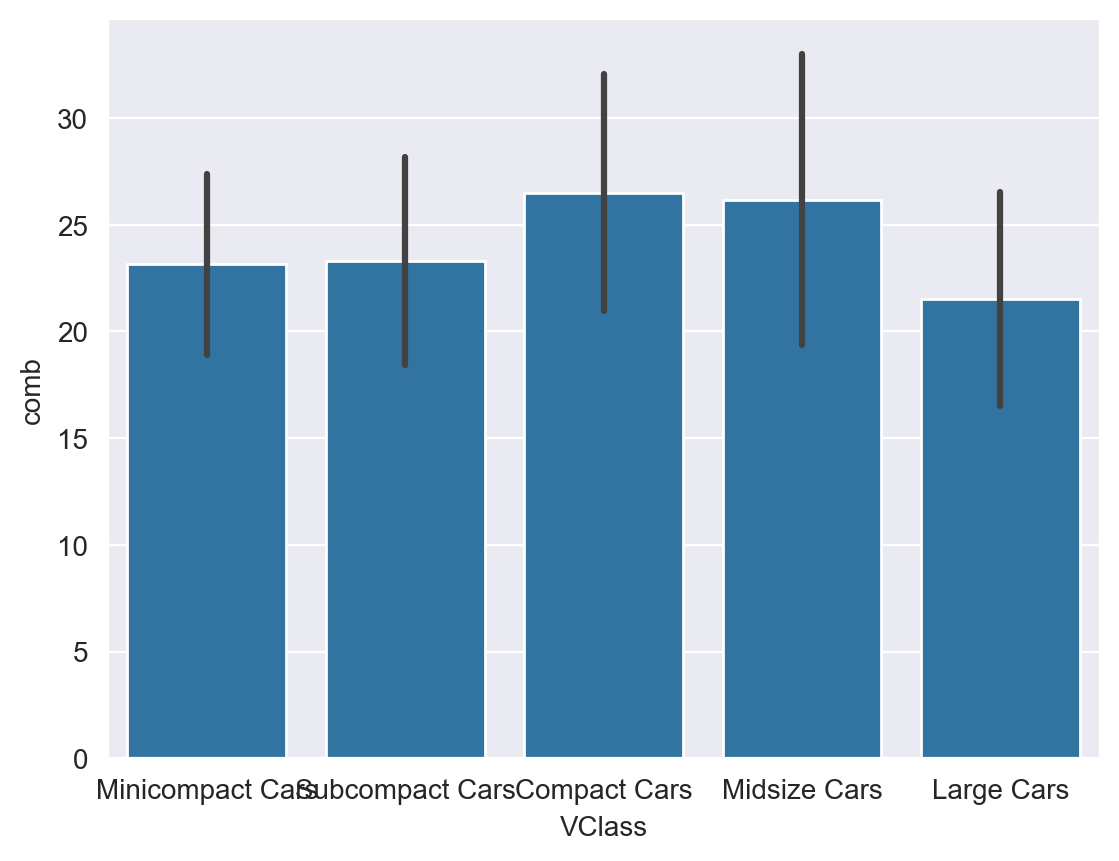

In [37]:
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errorbar='sd');

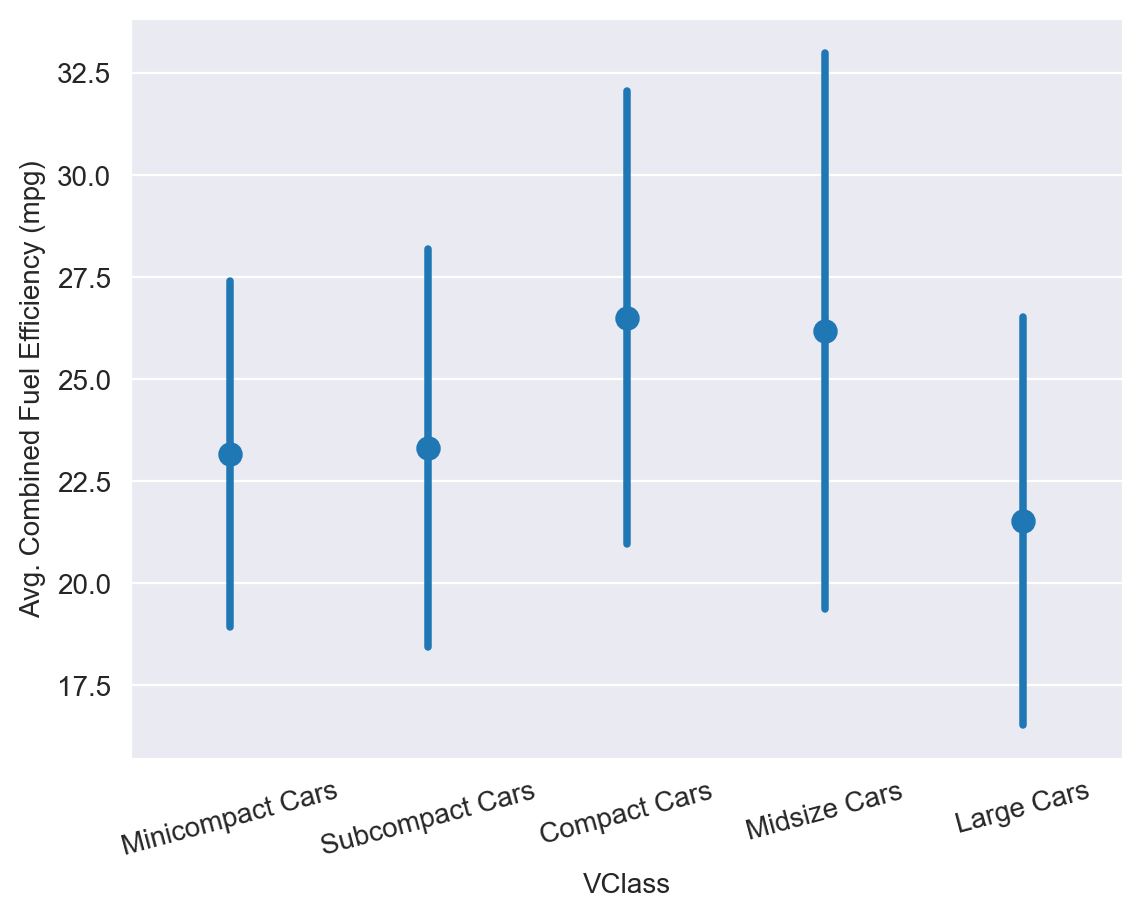

In [38]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errorbar='sd', linestyles='')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

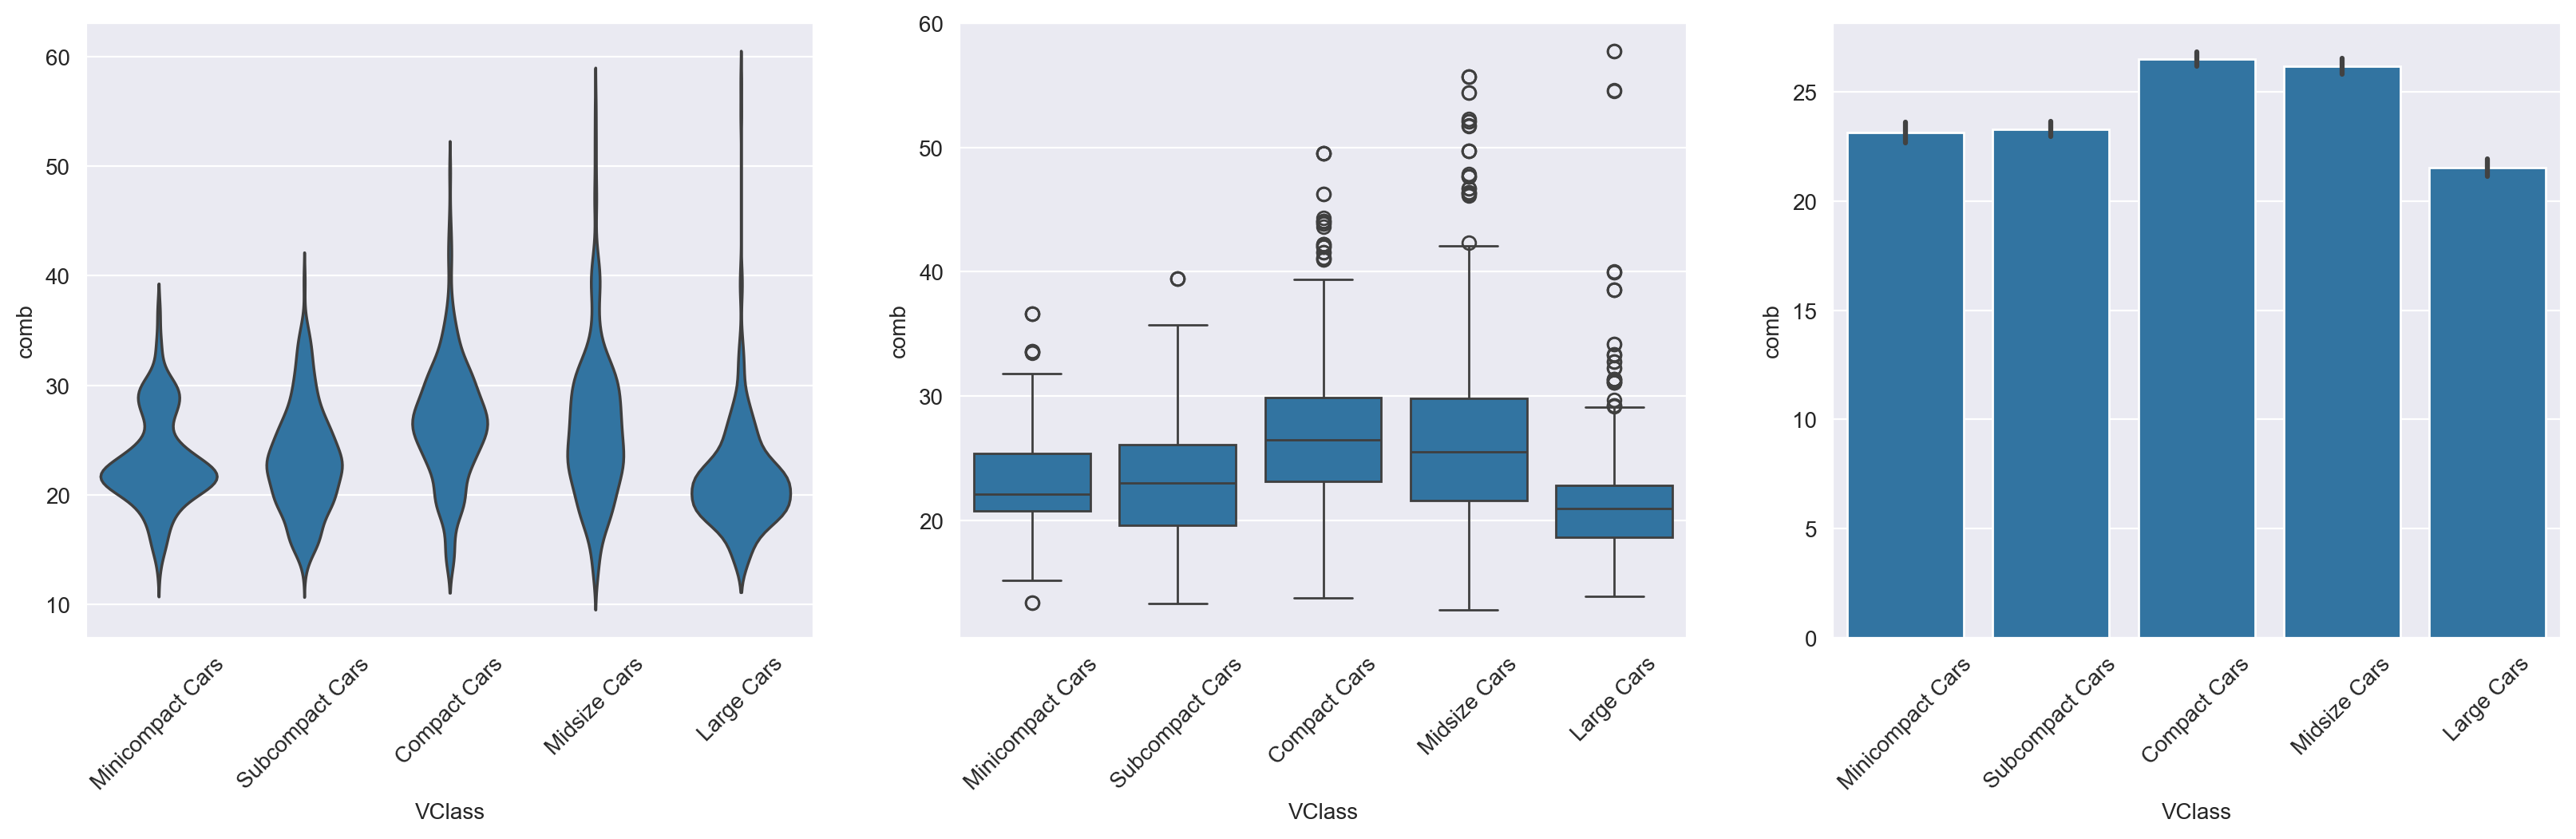

In [39]:
plt.figure(figsize=[20, 5])
base_color = sns.color_palette()[0]

plt.subplot(1, 3, 1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner=None, color=base_color)
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45);

### Line Plots

In [40]:
# In a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram)
# If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin

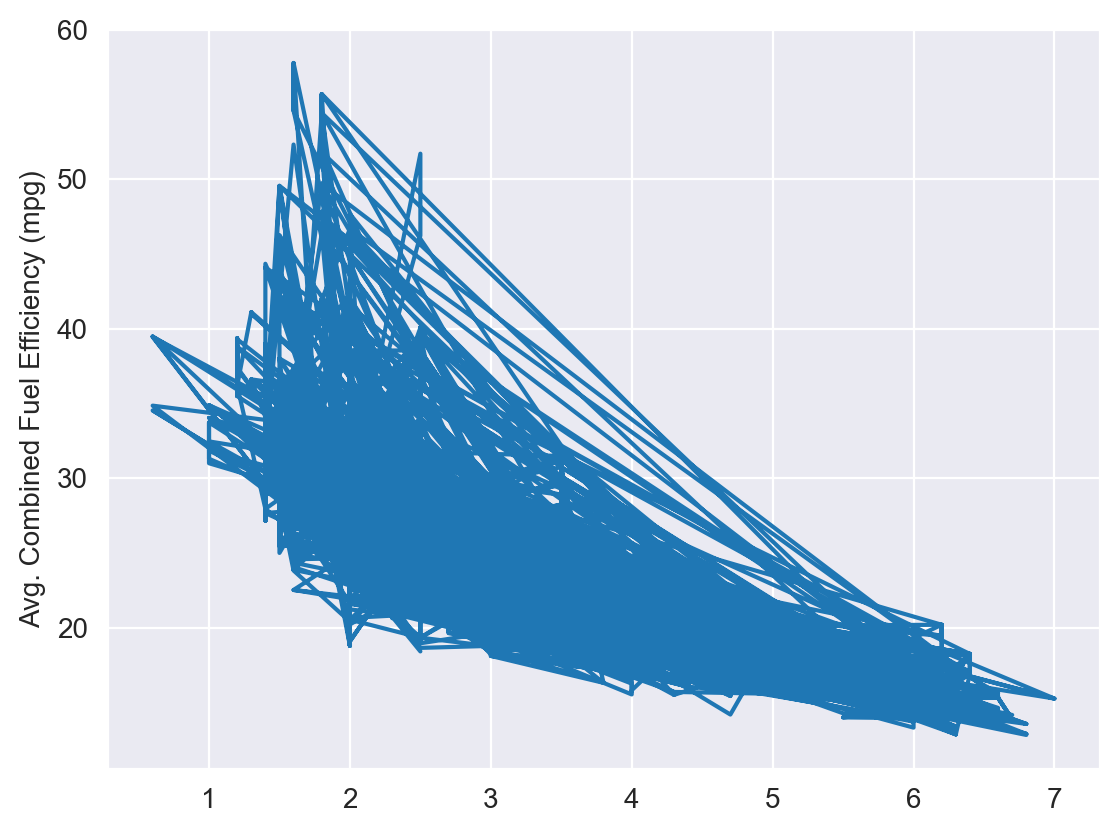

In [41]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

In [42]:
bin_edges = np.arange(0.6, 7 + 0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

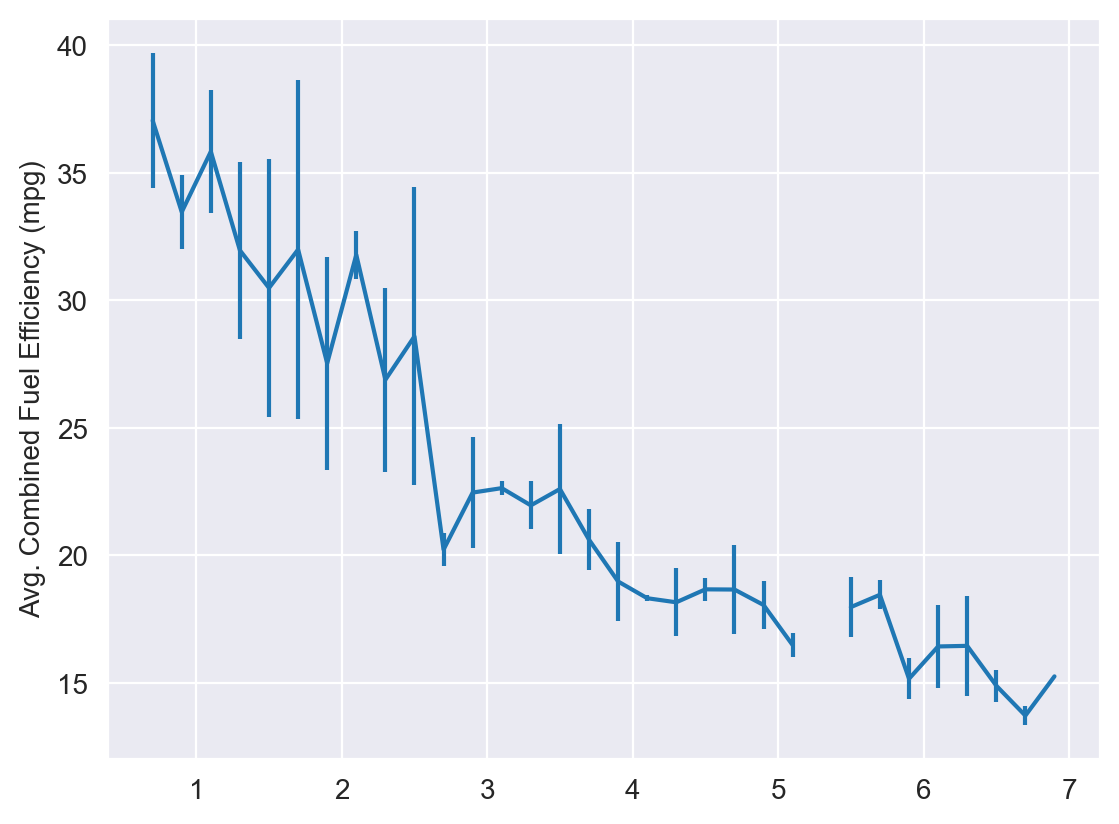

In [43]:
comb_mean = fuel_econ['comb'].groupby(displ_binned, observed=False).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned, observed=False).std()

plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

In [44]:
## compute statistics in a rolling window
# df_window = df.sort_values('num_var1').rolling(15)
# x_winmean = df_window.mean()['num_var1']
# y_median = df_window.median()['num_var2']
# y_q1 = df_window.quantile(.25)['num_var2']
# y_q3 = df_window.quantile(.75)['num_var2']
#
# ## plot the summarized data
# base_color = sns.color_palette()[0]
# line_color = sns.color_palette('dark')[0]
# plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
# plt.errorbar(x = x_winmean, y = y_median, c = line_color)
# plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
# plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')
#
# plt.xlabel('num_var1')
# plt.ylabel('num_var2')

In [45]:
# bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
# g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
# g.map(plt.hist, "num_var", bins = bin_edges, histtype = 'step')
# g.add_legend()

In [46]:
# def freq_poly(x, bins = 10, **kwargs):
#     """ Custom frequency polygon / line plot code. """
#     # set bin edges if none or int specified
#     if type(bins) == int:
#         bins = np.linspace(x.min(), x.max(), bins+1)
#     bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
#
#     # compute counts
#     data_bins = pd.cut(x, bins, right = False,
#                        include_lowest = True)
#     counts = x.groupby(data_bins).count()
#
#     # create plot
#     plt.errorbar(x = bin_centers, y = counts, **kwargs)
#
# bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
# g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
# g.map(freq_poly, "num_var", bins = bin_edges)
# g.add_legend()

### Summary


In [47]:
# Scatter plots = 2 quantitative vars
# Clustered Bar Charts = 2 qualitative vars
# Heatmaps = 2D histogram
# Violin Plots & Box Plots = 1 quantitative var & 1 qualitative var

/var/folders/6l/0v0lczzd3zg_6n8l7ysp7gyc0000gn/T/ipykernel_46739/1750279046.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(0,0.5,s = 1e4, c = sns.color_palette()[0], alpha = 0.5)
/var/folders/6l/0v0lczzd3zg_6n8l7ysp7gyc0000gn/T/ipykernel_46739/1750279046.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(0,-0.5,s = 1e4, c = sns.color_palette()[1], alpha = 0.5)
/var/folders/6l/0v0lczzd3zg_6n8l7ys

([], [])

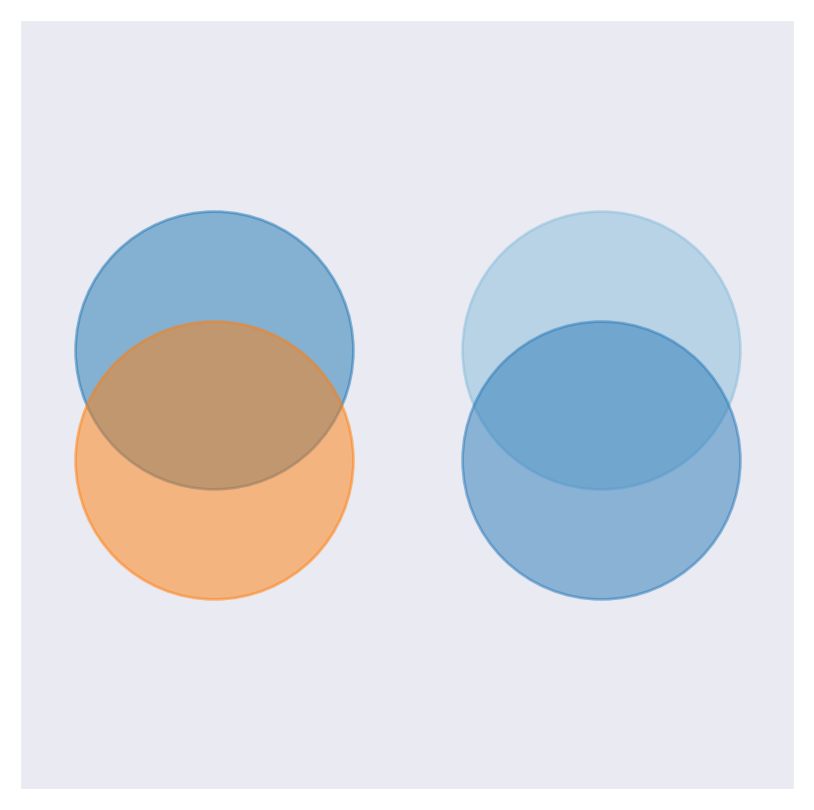

In [48]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sns.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sns.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sns.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sns.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([])

In [49]:
# g = sb.FacetGrid(data = df, col = 'cat_var2', row = 'cat_var1', size = 2.5,margin_titles = True)
# g.map(plt.scatter, 'num_var1', 'num_var2')

### Swarm Plots

In [50]:

# plt.figure(figsize = [12, 5])
# base_color = sb.color_palette()[0]
#
# # left plot: violin plot
# plt.subplot(1, 3, 1)
# ax1 = sb.violinplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
#
# # center plot: box plot
# plt.subplot(1, 3, 2)
# sb.boxplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
# plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
#
# # right plot: swarm plot
# plt.subplot(1, 3, 3)
# sb.swarmplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
# plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot


### Rug and Strip Plots

In [51]:
# g = sb.JointGrid(data = df, x = 'num_var1', y = 'num_var2')
# g.plot_joint(plt.scatter)
# g.plot_marginals(sb.rugplot, height = 0.25)

In [52]:
# Swarm plot
#
# plt.figure(figsize = [10, 5])
# base_color = sb.color_palette()[0]
#
# # left plot: strip plot
# plt.subplot(1, 2, 1)
# ax1 = sb.stripplot(data = df, x = 'num_var', y = 'cat_var',
#                    color = base_color)
#
# # right plot: violin plot with inner strip plot as lines
# plt.subplot(1, 2, 2)
# sb.violinplot(data = df, x = 'num_var', y = 'cat_var', color = base_color,
#              inner = 'stick')

### Stacked Plots

In [53]:
# # pre-processing: count and sort by the number of instances of each category
# sorted_counts = df['cat_var'].value_counts()
#
# # establish the Figure
# plt.figure(figsize = [12, 5])
#
# # left plot: pie chart
# plt.subplot(1, 2, 1)
# plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
#         counterclock = False);
# plt.axis('square');
#
# # right plot: horizontally stacked bar
# plt.subplot(1, 2, 2)
# baseline = 0
# for i in range(sorted_counts.shape[0]):
#     plt.barh(y = 1, width = sorted_counts[i], left = baseline)
#     baseline += sorted_counts[i]
#
# plt.legend(sorted_counts.index)  # add a legend for labeling
# plt.ylim([0,2]) # give some vertical spacing around the bar

In [54]:
# cat1_order = ['East', 'South', 'West', 'North']
# cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']
#
# plt.figure(figsize = [12, 5])
#
# # left plot: clustered bar chart, absolute counts
# plt.subplot(1, 2, 1)
# sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2',
#              order = cat1_order, hue_order = cat2_order)
# plt.legend()
#
# # right plot: stacked bar chart, absolute counts
# plt.subplot(1, 2, 2)
#
# baselines = np.zeros(len(cat1_order))
# # for each second-variable category:
# for i in range(len(cat2_order)):
#     # isolate the counts of the first category,
#     cat2 = cat2_order[i]
#     inner_counts = df[df['cat_var2'] == cat2]['cat_var1'].value_counts()
#     # then plot those counts on top of the accumulated baseline
#     plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
#             bottom = baselines)
#     baselines += inner_counts[cat1_order]
#
# plt.xticks(np.arange(len(cat1_order)), cat1_order)
# plt.legend(cat2_order)

In [55]:
# cat1_order = ['East', 'South', 'West', 'North']
# cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']
#
# artists = [] # for storing references to plot elements
# baselines = np.zeros(len(cat1_order))
# cat1_counts = df['cat_var1'].value_counts()
#
# # for each second-variable category:
# for i in range(len(cat2_order)):
#     # isolate the counts of the first category,
#     cat2 = cat2_order[i]
#     inner_counts = df[df['cat_var2'] == cat2]['cat_var1'].value_counts()
#     inner_props = inner_counts / cat1_counts
#     # then plot those counts on top of the accumulated baseline
#     bars = plt.bar(x = np.arange(len(cat1_order)),
#                    height = inner_props[cat1_order],
#                    bottom = baselines)
#     artists.append(bars)
#     baselines += inner_props[cat1_order]
#
# plt.xticks(np.arange(len(cat1_order)), cat1_order)
# plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
#            bbox_to_anchor = (1, 0.5), loc = 6);